In [2]:
from input import read_input
from math import sqrt, floor
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ingredients, area, pizza = read_input('medium.in')
pizza

array([[ True, False, False, ..., False,  True, False],
       [False,  True, False, ..., False, False, False],
       [ True, False, False, ...,  True, False, False],
       ..., 
       [ True, False,  True, ..., False, False,  True],
       [False, False, False, ..., False,  True, False],
       [False,  True,  True, ..., False, False,  True]], dtype=bool)

In [17]:
def find_all_sizes(max_area):
    sizes = []
    def exist_better(x, y):
        for _x, _y in sizes:
            if _x >= x and _y >= y:
                return True
        return False
    
    for x in range(1, max_area * 2 + 1)[::-1]:
        for y in range(1, max_area * 2 + 1)[::-1]:
            if x * y <= max_area:
                if not exist_better(x, y):
                    sizes.append((x, y))
                    
    return sizes

In [18]:
find_all_sizes(14)

[(14, 1), (7, 2), (4, 3), (3, 4), (2, 7), (1, 14)]

In [19]:
def get_slice(pizza, x, y, x_size, y_size):
    return pizza[x : x + x_size, y: y + y_size]

In [20]:
def slice_is_ok(pizza_slice, min_ingredients):
    if np.sum(pizza_slice) < min_ingredients:
        return False
    if np.sum(np.ones(pizza_slice.shape) - pizza_slice) < min_ingredients:
        return False
    return True

In [21]:
def run_algo(ingredients, area, pizza, x_max, y_max):    
    print(pizza.shape)
    taken_matrix = np.zeros(pizza.shape)
    taken = []
    # First fill
    for x in range(0, pizza.shape[0], x_max):
        for y in range(0, pizza.shape[1], y_max):
#            print(x, y)
            pizza_slice = get_slice(pizza, x, y, x_max, y_max)
    #        print(pizza_slice, slice_is_ok(pizza_slice, ingredients))

            if slice_is_ok(pizza_slice, ingredients):
#                print('slice ok:', x, y)
                taken_matrix[x : x + x_max, y: y + y_max] = np.ones(pizza_slice.shape)
    #            print('TAKEN', taken_matrix)
                taken.append((x, x + x_max, y, y + y_max))

    # print(taken)
    return taken, taken_matrix

(1000, 1000)
572166.0


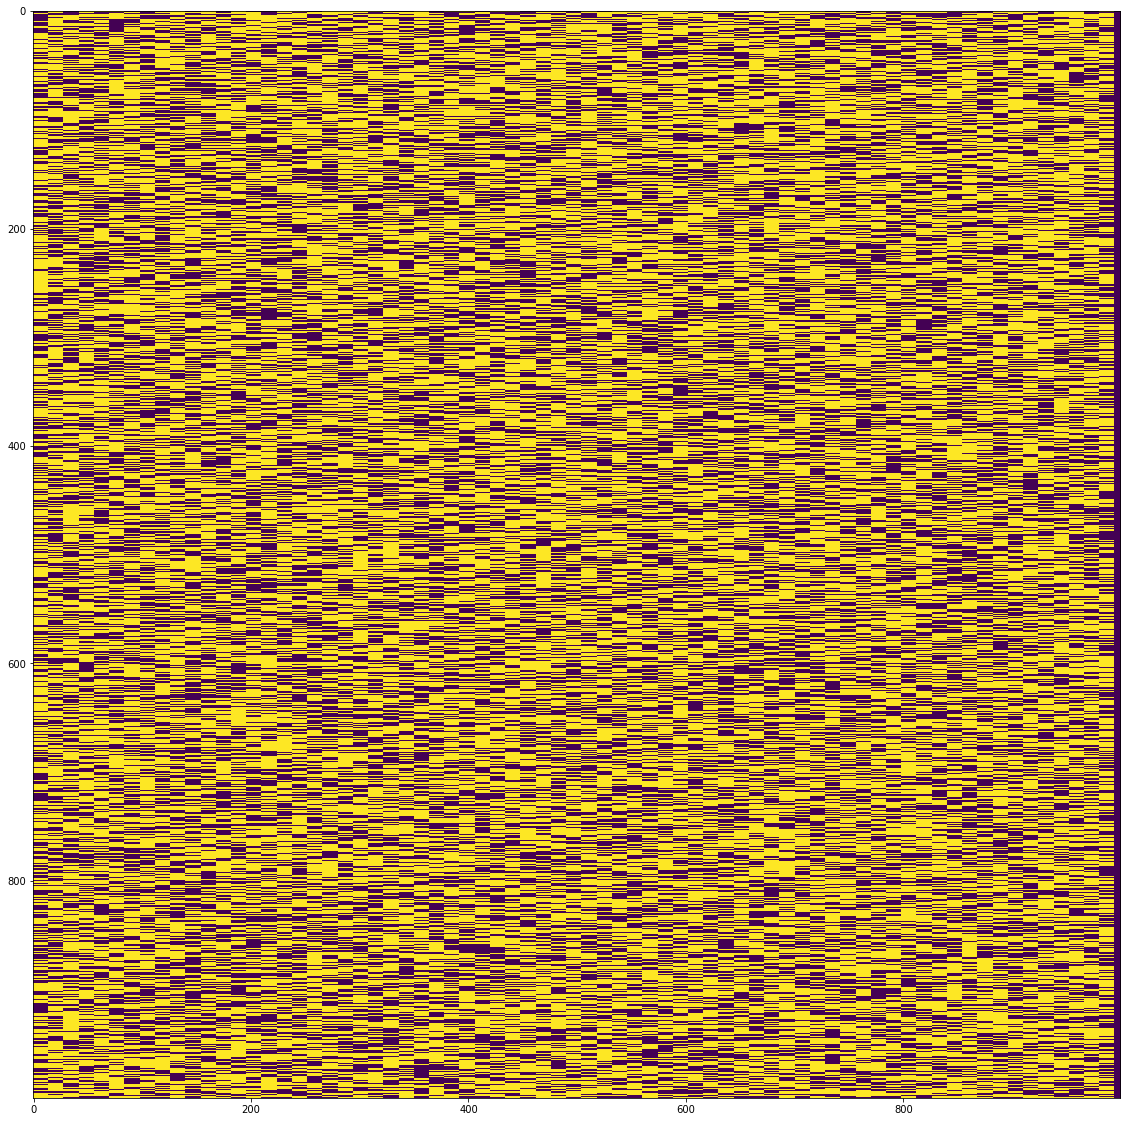

(1000, 1000)
574500.0


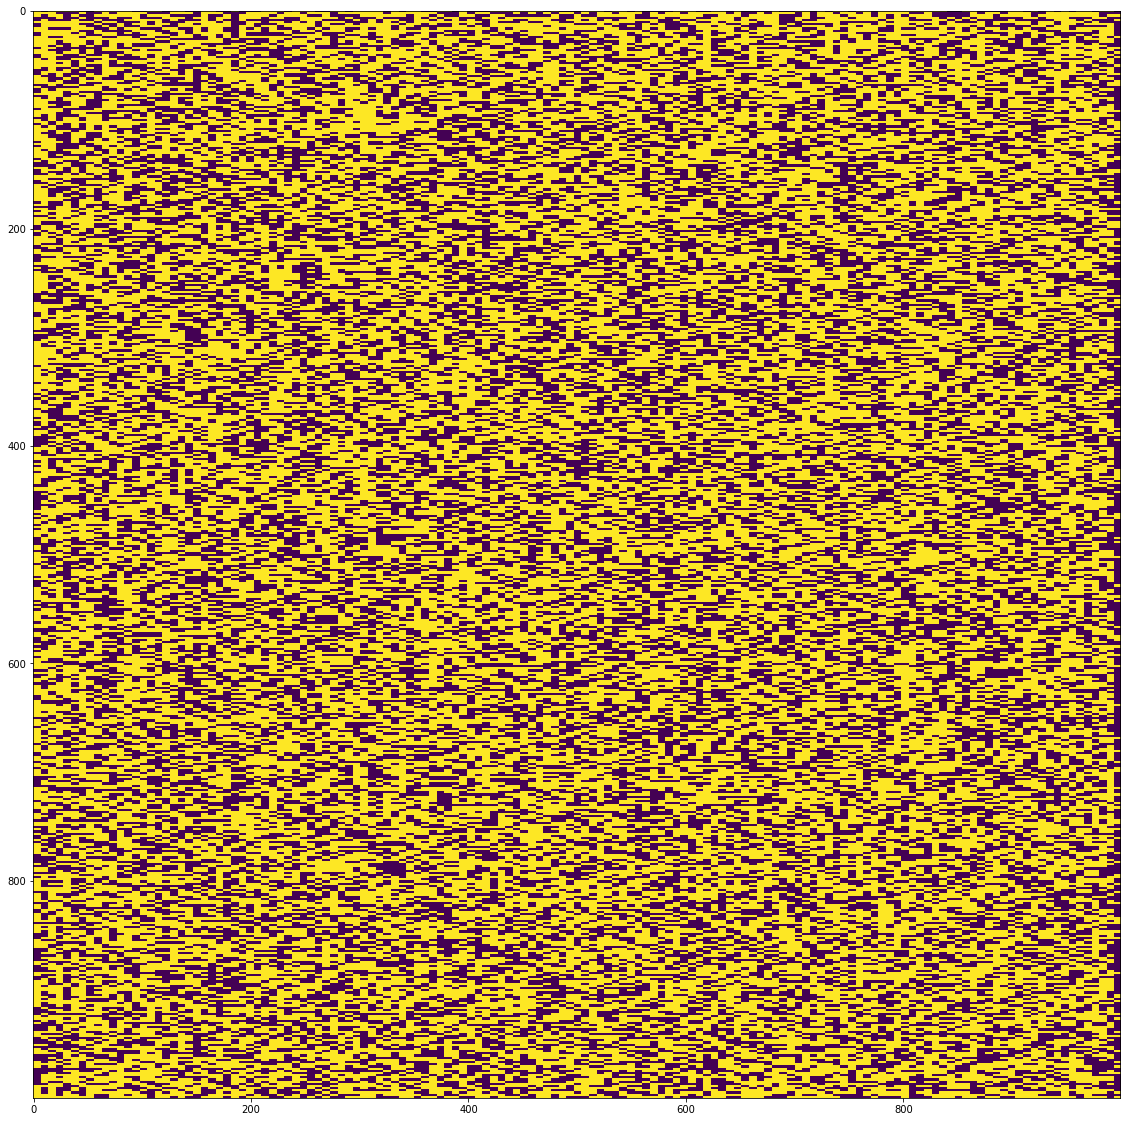

(1000, 1000)
225432.0


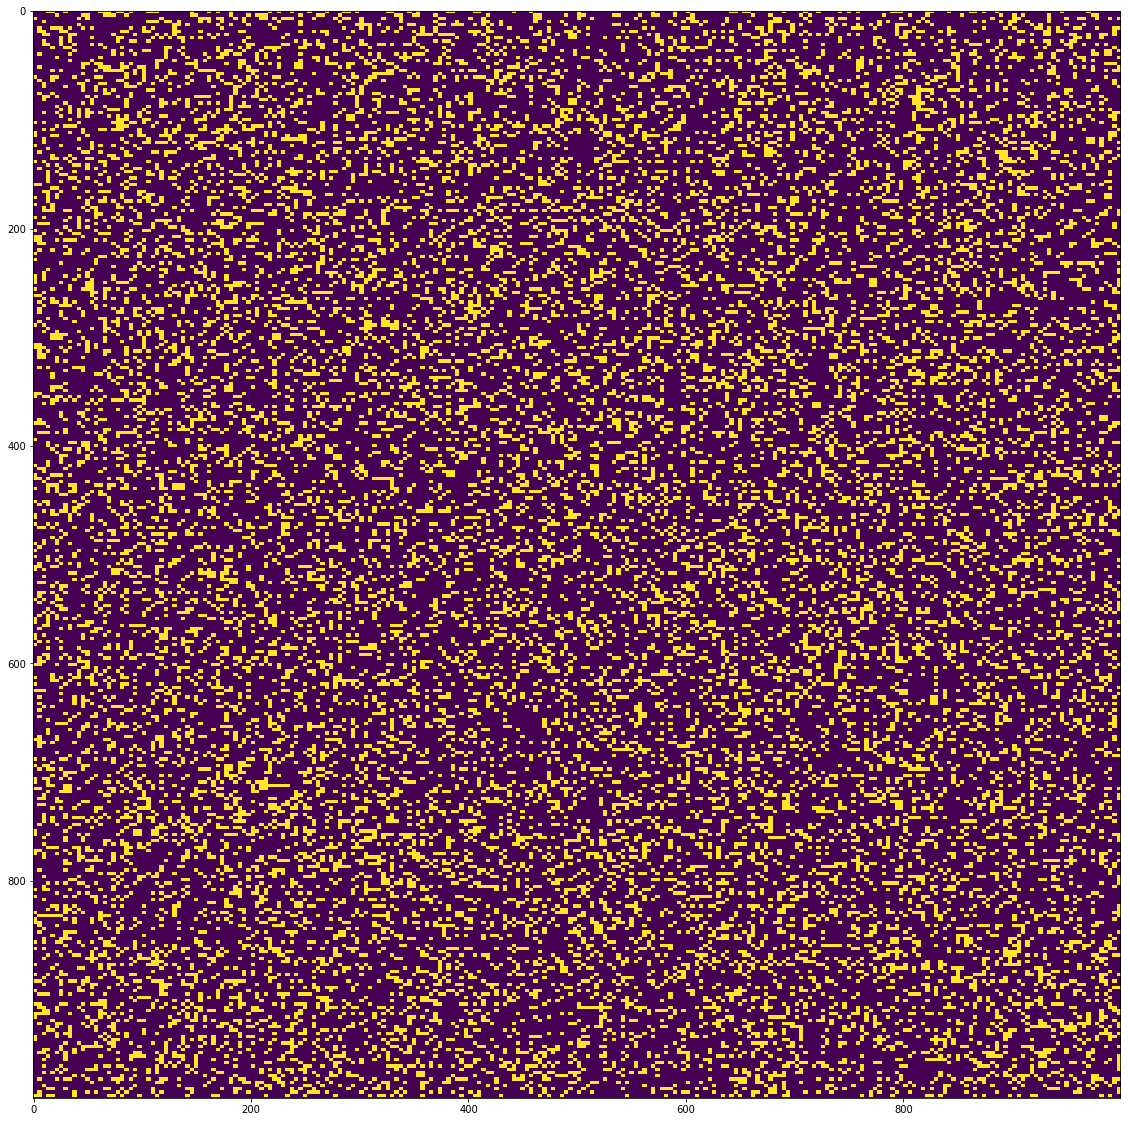

(1000, 1000)
225264.0


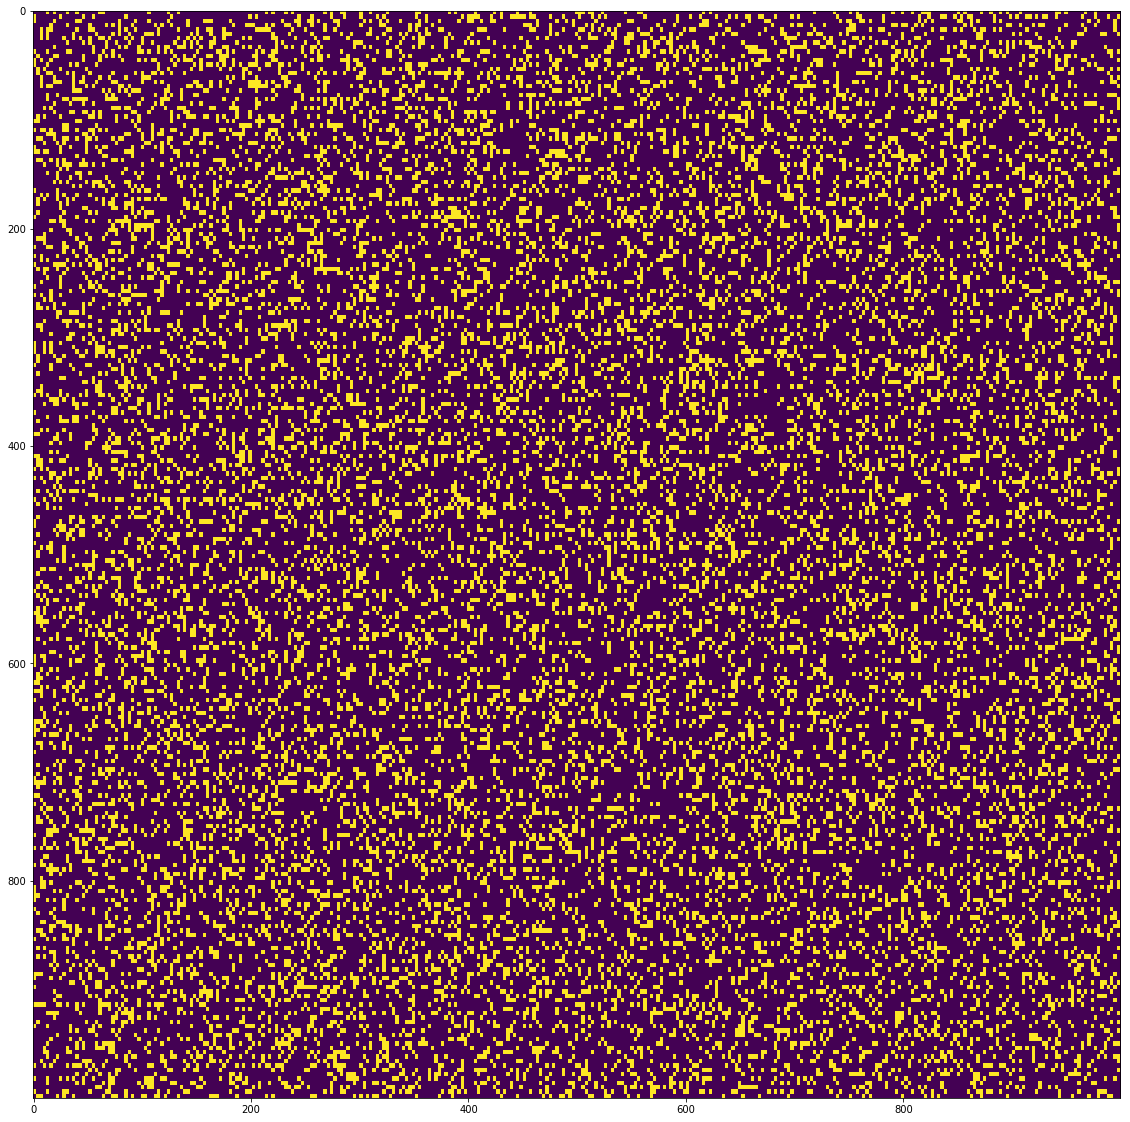

(1000, 1000)
573330.0


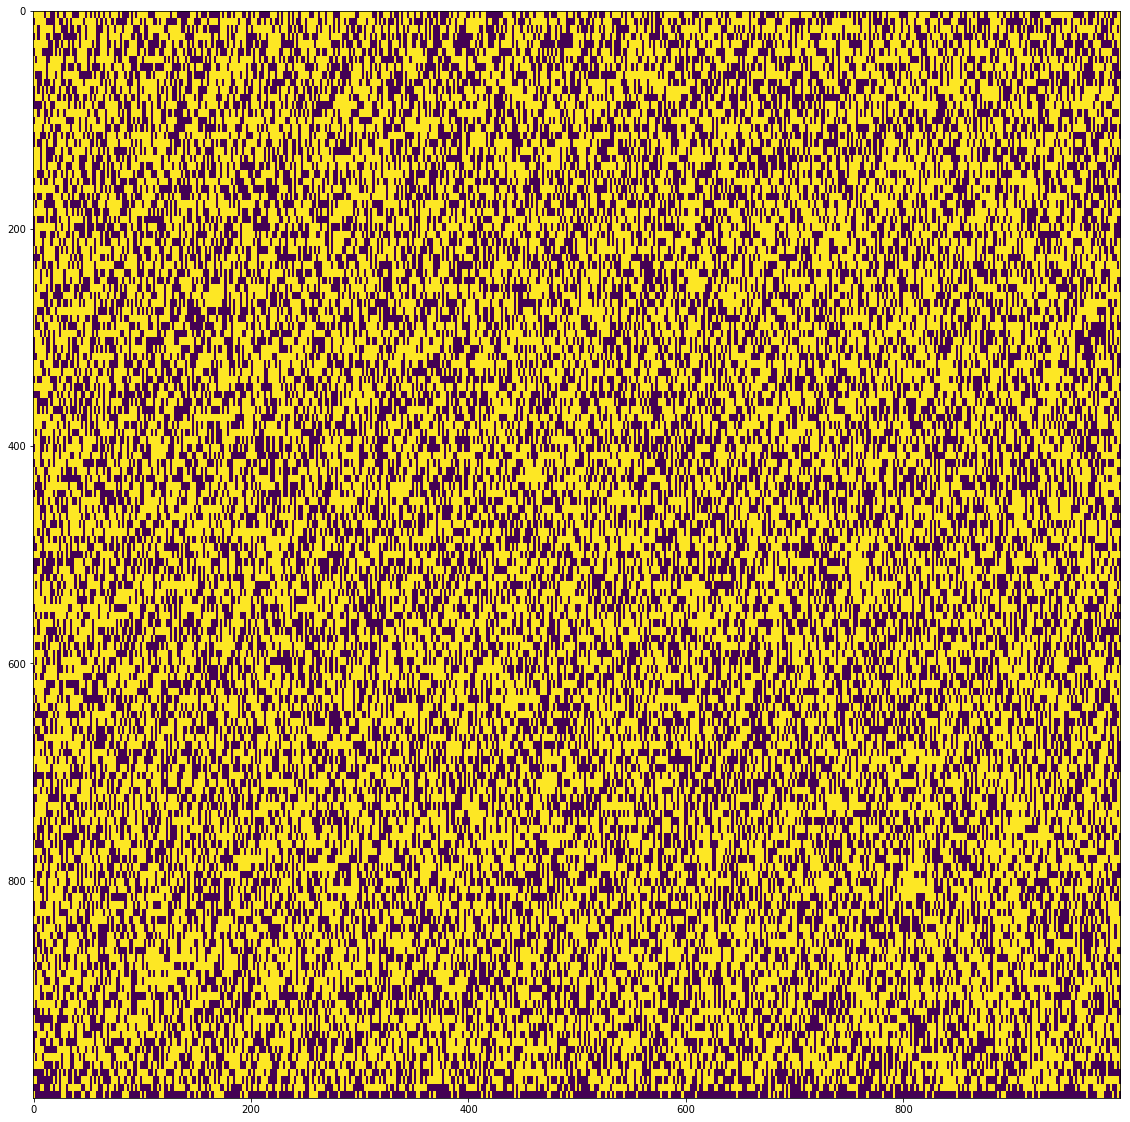

(1000, 1000)
573678.0


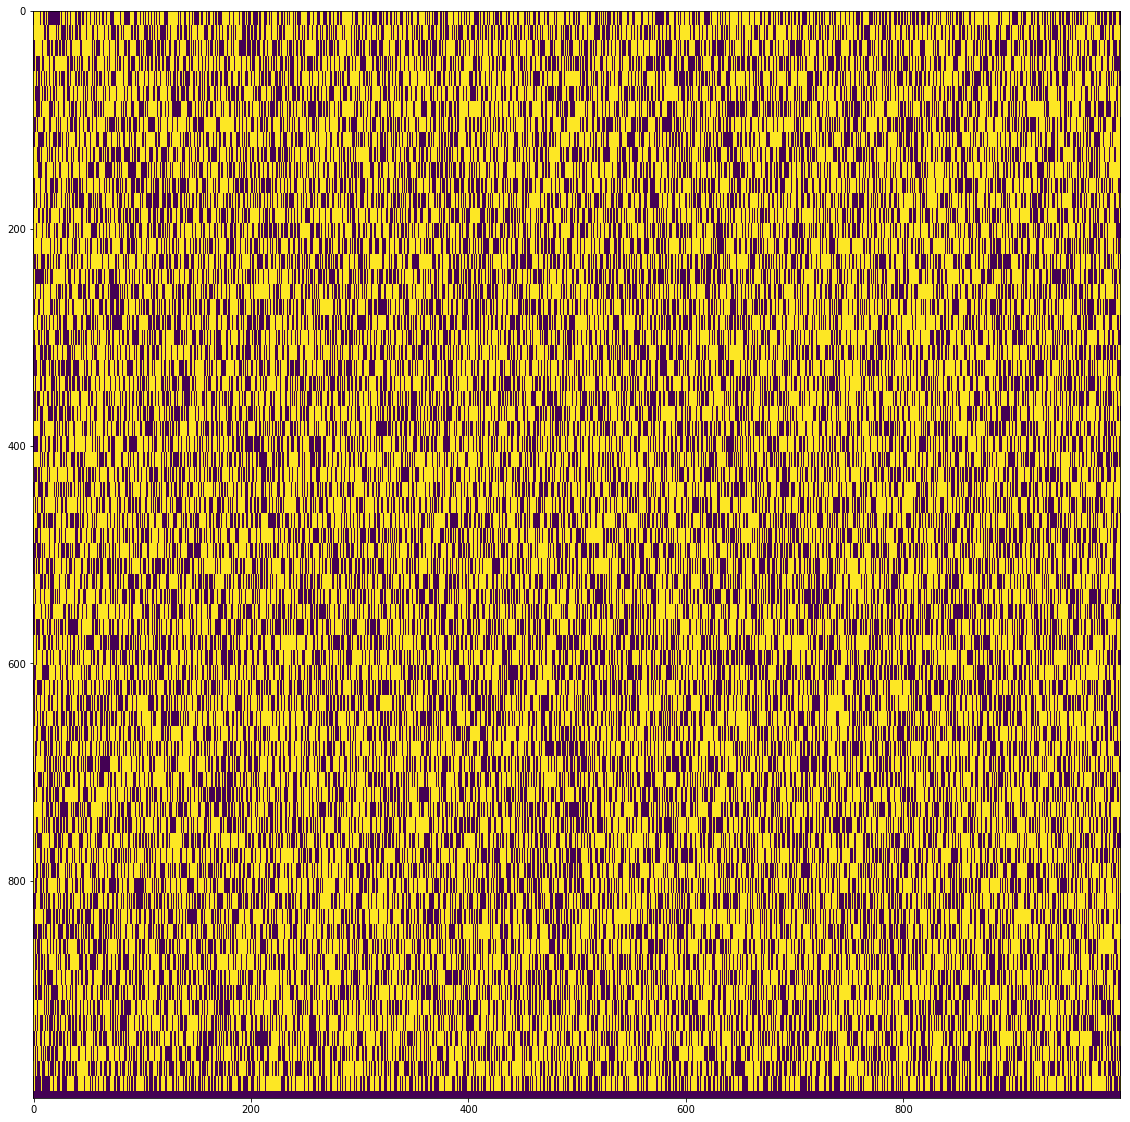

In [22]:
for x_max, y_max in find_all_sizes(area):
    taken, taken_matrix = run_algo(ingredients, area, pizza, x_max, y_max)
    print(np.sum(taken_matrix))
    plt.figure(figsize =(20,20))
    plt.imshow(np.transpose(taken_matrix))
    plt.show()

## Jerem Part ;)

In [94]:
val = np.array([[1,2,2,2],[1,2,2,2],[1,2,2,2],[1,2,2,2]])

In [95]:
val[1:-1,1:-1] = True

In [96]:
val

array([[1, 2, 2, 2],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 2, 2, 2]])

In [19]:
from IPython import display
import time
def rec(mat, l, h):
    lt = 0
    lm = 0
    mask = np.ones(mat.shape)
    deb = np.array([0, 0])
    end = np.array([0, 0])
    total = 0
    while deb[0]+1 < mat.shape[0] or deb[1]+1 < mat.shape[1]:
        val, tot, end = add(mat, mask, deb, deb, lm, lt, l, h)
        print 'deb :' +str(deb)
        if val:
            mask[deb[0]:(end[0]+1), deb[1]:(end[1]+1)] = 0
            print len(np.where(mask==0)[0])
            #plt.figure(figsize =(10,10))
            #plt.imshow(mask)
            total += tot
            print deb[0],end[0],deb[1],end[1]
            #display.clear_output(wait=True)
            #display.display(plt.gcf())
            #time.sleep(1.0)
            print '------> total : ' +str(total) + "  deb : " +str(deb) + " end : " +str(end)
        if deb[0]+1 < mat.shape[0]: deb[0] += 1
        else: deb = np.array([0,deb[1]+1])
    return mask, total

In [20]:
def add(mat, maska, deb, end, lm, lt, l, h):
    if maska[end[0],end[1]]:
        a = (end + np.array([1, 1])) - deb
        tot = a[0] * a[1]
       # print 'tot:' + str(tot) +', a : ' + str(a) + ', end : ' +str(end)
        if tot <= h:
            if mat[end[0],end[1]]:
                lt += 1
            else:
                lm += 1
            maska[end[0],end[1]]=0
            if lt >= l and lm >= l:
               # print 'ok'
                return True, tot, end
            else :
               # print 'no'
                if end[0]+1 < mat.shape[0]:
                    vala, tota, enda = add(mat, maska, deb, end+np.array([1,0]), lm, lt, l, h)
                    if vala: return True, tota, enda
                if end[1]+1 < mat.shape[1]:
                    valb, totb, endb = add(mat, maska, deb, end+np.array([0,1]), lm, lt, l, h)
                    if valb: return True, totb, endb
    return False, False, False

In [21]:
mask, total = rec(pizza, ingredients, area)

deb :[0 0]
8
0 7 0 0
------> total : 8  deb : [0 0] end : [7 0]
deb :[1 0]
deb :[2 0]
deb :[3 0]
deb :[4 0]
deb :[5 0]
deb :[6 0]
deb :[7 0]
deb :[8 0]
17
8 16 0 0
------> total : 17  deb : [8 0] end : [16  0]
deb :[9 0]
deb :[10  0]
deb :[11  0]
deb :[12  0]
deb :[13  0]
deb :[14  0]
deb :[15  0]
deb :[16  0]
deb :[17  0]
49
17 17 0 8
------> total : 26  deb : [17  0] end : [17  8]
deb :[18  0]
deb :[19  0]
deb :[20  0]
deb :[21  0]
deb :[22  0]
deb :[23  0]
deb :[24  0]
deb :[25  0]
deb :[26  0]
deb :[27  0]
deb :[28  0]
deb :[29  0]
82
29 29 0 9
------> total : 36  deb : [29  0] end : [29  9]
deb :[30  0]
deb :[31  0]
deb :[32  0]
deb :[33  0]
deb :[34  0]
deb :[35  0]
deb :[36  0]
deb :[37  0]
deb :[38  0]
deb :[39  0]
deb :[40  0]
deb :[41  0]
115
41 41 0 9
------> total : 46  deb : [41  0] end : [41  9]
deb :[42  0]
deb :[43  0]
deb :[44  0]
deb :[45  0]
deb :[46  0]
deb :[47  0]
deb :[48  0]
deb :[49  0]
deb :[50  0]
deb :[51  0]
deb :[52  0]
deb :[53  0]
124
53 61 0 0
------> t

------> total : 510  deb : [144   2] end : [144  11]
deb :[145   2]
deb :[146   2]
deb :[147   2]
deb :[148   2]
deb :[149   2]
deb :[150   2]
deb :[151   2]
deb :[152   2]
deb :[153   2]
deb :[154   2]
deb :[155   2]
deb :[156   2]
deb :[157   2]
deb :[158   2]
deb :[159   2]
deb :[160   2]
deb :[161   2]
956
161 171 2 2
------> total : 521  deb : [161   2] end : [171   2]
deb :[162   2]
deb :[163   2]
deb :[164   2]
deb :[165   2]
deb :[166   2]
deb :[167   2]
deb :[168   2]
deb :[169   2]
deb :[170   2]
deb :[171   2]
deb :[172   2]
967
172 182 2 2
------> total : 532  deb : [172   2] end : [182   2]
deb :[173   2]
deb :[174   2]
deb :[175   2]
deb :[176   2]
deb :[177   2]
deb :[178   2]
deb :[179   2]
deb :[180   2]
deb :[181   2]
deb :[182   2]
deb :[183   2]
deb :[184   2]
deb :[185   2]
deb :[186   2]
deb :[187   2]
deb :[188   2]
deb :[189   2]
994
189 189 2 11
------> total : 542  deb : [189   2] end : [189  11]
deb :[190   2]
deb :[191   2]
deb :[192   2]
deb :[193   2]
deb 

1824
112 112 5 14
------> total : 1066  deb : [112   5] end : [112  14]
deb :[113   5]
deb :[114   5]
deb :[115   5]
deb :[116   5]
deb :[117   5]
deb :[118   5]
deb :[119   5]
1833
119 119 5 13
------> total : 1075  deb : [119   5] end : [119  13]
deb :[120   5]
deb :[121   5]
deb :[122   5]
deb :[123   5]
deb :[124   5]
deb :[125   5]
deb :[126   5]
1842
126 126 5 13
------> total : 1084  deb : [126   5] end : [126  13]
deb :[127   5]
deb :[128   5]
deb :[129   5]
deb :[130   5]
deb :[131   5]
1850
131 138 5 5
------> total : 1092  deb : [131   5] end : [138   5]
deb :[132   5]
deb :[133   5]
deb :[134   5]
deb :[135   5]
deb :[136   5]
deb :[137   5]
deb :[138   5]
deb :[139   5]
1859
139 139 5 13
------> total : 1101  deb : [139   5] end : [139  13]
deb :[140   5]
deb :[141   5]
deb :[142   5]
deb :[143   5]
deb :[144   5]
deb :[145   5]
deb :[146   5]
deb :[147   5]
1869
147 147 5 14
------> total : 1111  deb : [147   5] end : [147  14]
deb :[148   5]
deb :[149   5]
deb :[150   5]

deb :[98  8]
2570
98 98 8 15
------> total : 1498  deb : [98  8] end : [98 15]
deb :[99  8]
deb :[100   8]
deb :[101   8]
deb :[102   8]
deb :[103   8]
deb :[104   8]
deb :[105   8]
deb :[106   8]
deb :[107   8]
2583
107 107 8 18
------> total : 1509  deb : [107   8] end : [107  18]
deb :[108   8]
deb :[109   8]
deb :[110   8]
deb :[111   8]
deb :[112   8]
deb :[113   8]
deb :[114   8]
deb :[115   8]
deb :[116   8]
2593
116 116 8 15
------> total : 1517  deb : [116   8] end : [116  15]
deb :[117   8]
deb :[118   8]
deb :[119   8]
deb :[120   8]
deb :[121   8]
deb :[122   8]
deb :[123   8]
deb :[124   8]
2604
124 124 8 18
------> total : 1528  deb : [124   8] end : [124  18]
deb :[125   8]
deb :[126   8]
deb :[127   8]
deb :[128   8]
deb :[129   8]
deb :[130   8]
deb :[131   8]
deb :[132   8]
deb :[133   8]
deb :[134   8]
deb :[135   8]
2622
135 135 8 19
------> total : 1540  deb : [135   8] end : [135  19]
deb :[136   8]
deb :[137   8]
deb :[138   8]
deb :[139   8]
deb :[140   8]
deb :

187 187 11 20
------> total : 1990  deb : [187  11] end : [187  20]
deb :[188  11]
deb :[189  11]
deb :[190  11]
deb :[191  11]
deb :[192  11]
deb :[193  11]
deb :[194  11]
deb :[195  11]
deb :[196  11]
deb :[197  11]
deb :[198  11]
deb :[199  11]
deb :[ 0 12]
3276
0 0 12 19
------> total : 1998  deb : [ 0 12] end : [ 0 19]
deb :[ 1 12]
deb :[ 2 12]
deb :[ 3 12]
deb :[ 4 12]
deb :[ 5 12]
deb :[ 6 12]
deb :[ 7 12]
deb :[ 8 12]
deb :[ 9 12]
deb :[10 12]
3285
10 10 12 20
------> total : 2007  deb : [10 12] end : [10 20]
deb :[11 12]
deb :[12 12]
deb :[13 12]
deb :[14 12]
deb :[15 12]
deb :[16 12]
deb :[17 12]
deb :[18 12]
deb :[19 12]
deb :[20 12]
deb :[21 12]
deb :[22 12]
deb :[23 12]
deb :[24 12]
deb :[25 12]
deb :[26 12]
3293
26 26 12 19
------> total : 2015  deb : [26 12] end : [26 19]
deb :[27 12]
deb :[28 12]
deb :[29 12]
deb :[30 12]
deb :[31 12]
deb :[32 12]
3307
32 32 12 19
------> total : 2023  deb : [32 12] end : [32 19]
deb :[33 12]
deb :[34 12]
deb :[35 12]
deb :[36 12]
deb :

deb :[66 15]
deb :[67 15]
deb :[68 15]
deb :[69 15]
deb :[70 15]
deb :[71 15]
deb :[72 15]
deb :[73 15]
deb :[74 15]
deb :[75 15]
deb :[76 15]
deb :[77 15]
deb :[78 15]
deb :[79 15]
deb :[80 15]
deb :[81 15]
3954
81 81 15 23
------> total : 2486  deb : [81 15] end : [81 23]
deb :[82 15]
deb :[83 15]
deb :[84 15]
deb :[85 15]
deb :[86 15]
deb :[87 15]
deb :[88 15]
deb :[89 15]
deb :[90 15]
deb :[91 15]
deb :[92 15]
3963
92 92 15 23
------> total : 2495  deb : [92 15] end : [92 23]
deb :[93 15]
deb :[94 15]
deb :[95 15]
deb :[96 15]
deb :[97 15]
deb :[98 15]
deb :[99 15]
deb :[100  15]
deb :[101  15]
deb :[102  15]
deb :[103  15]
deb :[104  15]
deb :[105  15]
3972
105 105 15 23
------> total : 2504  deb : [105  15] end : [105  23]
deb :[106  15]
deb :[107  15]
deb :[108  15]
deb :[109  15]
deb :[110  15]
3984
110 110 15 22
------> total : 2512  deb : [110  15] end : [110  22]
deb :[111  15]
deb :[112  15]
deb :[113  15]
deb :[114  15]
deb :[115  15]
deb :[116  15]
deb :[117  15]
deb :[11

deb :[177  18]
deb :[178  18]
deb :[179  18]
deb :[180  18]
deb :[181  18]
deb :[182  18]
deb :[183  18]
deb :[184  18]
deb :[185  18]
deb :[186  18]
deb :[187  18]
deb :[188  18]
deb :[189  18]
deb :[190  18]
deb :[191  18]
deb :[192  18]
deb :[193  18]
deb :[194  18]
4586
194 194 18 25
------> total : 2935  deb : [194  18] end : [194  25]
deb :[195  18]
deb :[196  18]
deb :[197  18]
deb :[198  18]
deb :[199  18]
deb :[ 0 19]
deb :[ 1 19]
deb :[ 2 19]
deb :[ 3 19]
deb :[ 4 19]
deb :[ 5 19]
deb :[ 6 19]
deb :[ 7 19]
deb :[ 8 19]
deb :[ 9 19]
deb :[10 19]
deb :[11 19]
deb :[12 19]
deb :[13 19]
deb :[14 19]
4595
14 14 19 27
------> total : 2944  deb : [14 19] end : [14 27]
deb :[15 19]
deb :[16 19]
deb :[17 19]
deb :[18 19]
4604
18 18 19 26
------> total : 2952  deb : [18 19] end : [18 26]
deb :[19 19]
deb :[20 19]
deb :[21 19]
deb :[22 19]
deb :[23 19]
deb :[24 19]
deb :[25 19]
deb :[26 19]
deb :[27 19]
deb :[28 19]
deb :[29 19]
deb :[30 19]
deb :[31 19]
deb :[32 19]
deb :[33 19]
deb :[

deb :[58 22]
deb :[59 22]
5339
59 59 22 30
------> total : 3452  deb : [59 22] end : [59 30]
deb :[60 22]
deb :[61 22]
deb :[62 22]
deb :[63 22]
5349
63 63 22 31
------> total : 3462  deb : [63 22] end : [63 31]
deb :[64 22]
deb :[65 22]
deb :[66 22]
deb :[67 22]
deb :[68 22]
deb :[69 22]
deb :[70 22]
deb :[71 22]
deb :[72 22]
deb :[73 22]
deb :[74 22]
5365
74 74 22 29
------> total : 3470  deb : [74 22] end : [74 29]
deb :[75 22]
deb :[76 22]
deb :[77 22]
deb :[78 22]
deb :[79 22]
deb :[80 22]
deb :[81 22]
deb :[82 22]
deb :[83 22]
deb :[84 22]
deb :[85 22]
deb :[86 22]
deb :[87 22]
deb :[88 22]
deb :[89 22]
deb :[90 22]
deb :[91 22]
5381
91 91 22 31
------> total : 3480  deb : [91 22] end : [91 31]
deb :[92 22]
deb :[93 22]
deb :[94 22]
deb :[95 22]
deb :[96 22]
deb :[97 22]
deb :[98 22]
deb :[99 22]
5393
99 99 22 33
------> total : 3492  deb : [99 22] end : [99 33]
deb :[100  22]
deb :[101  22]
deb :[102  22]
deb :[103  22]
deb :[104  22]
5410
104 104 22 33
------> total : 3504  deb

deb :[139  25]
deb :[140  25]
deb :[141  25]
deb :[142  25]
deb :[143  25]
deb :[144  25]
deb :[145  25]
deb :[146  25]
deb :[147  25]
deb :[148  25]
deb :[149  25]
deb :[150  25]
deb :[151  25]
deb :[152  25]
deb :[153  25]
deb :[154  25]
deb :[155  25]
deb :[156  25]
deb :[157  25]
deb :[158  25]
deb :[159  25]
deb :[160  25]
deb :[161  25]
deb :[162  25]
deb :[163  25]
deb :[164  25]
deb :[165  25]
deb :[166  25]
deb :[167  25]
deb :[168  25]
deb :[169  25]
deb :[170  25]
deb :[171  25]
deb :[172  25]
deb :[173  25]
deb :[174  25]
6029
174 174 25 33
------> total : 3958  deb : [174  25] end : [174  33]
deb :[175  25]
deb :[176  25]
deb :[177  25]
deb :[178  25]
deb :[179  25]
deb :[180  25]
deb :[181  25]
deb :[182  25]
deb :[183  25]
deb :[184  25]
deb :[185  25]
6037
185 185 25 32
------> total : 3966  deb : [185  25] end : [185  32]
deb :[186  25]
deb :[187  25]
deb :[188  25]
deb :[189  25]
deb :[190  25]
deb :[191  25]
deb :[192  25]
6050
192 192 25 36
------> total : 3978  deb

deb :[32 29]
deb :[33 29]
deb :[34 29]
deb :[35 29]
deb :[36 29]
6664
36 36 29 36
------> total : 4428  deb : [36 29] end : [36 36]
deb :[37 29]
deb :[38 29]
deb :[39 29]
deb :[40 29]
deb :[41 29]
deb :[42 29]
6672
42 42 29 36
------> total : 4436  deb : [42 29] end : [42 36]
deb :[43 29]
deb :[44 29]
deb :[45 29]
deb :[46 29]
deb :[47 29]
deb :[48 29]
deb :[49 29]
deb :[50 29]
deb :[51 29]
deb :[52 29]
deb :[53 29]
deb :[54 29]
deb :[55 29]
deb :[56 29]
deb :[57 29]
deb :[58 29]
deb :[59 29]
deb :[60 29]
deb :[61 29]
deb :[62 29]
deb :[63 29]
deb :[64 29]
deb :[65 29]
deb :[66 29]
deb :[67 29]
deb :[68 29]
deb :[69 29]
6682
69 69 29 38
------> total : 4446  deb : [69 29] end : [69 38]
deb :[70 29]
deb :[71 29]
deb :[72 29]
deb :[73 29]
deb :[74 29]
deb :[75 29]
deb :[76 29]
deb :[77 29]
deb :[78 29]
deb :[79 29]
deb :[80 29]
deb :[81 29]
deb :[82 29]
deb :[83 29]
deb :[84 29]
deb :[85 29]
deb :[86 29]
6705
86 86 29 37
------> total : 4455  deb : [86 29] end : [86 37]
deb :[87 29]
deb 

7388
139 139 32 39
------> total : 4924  deb : [139  32] end : [139  39]
deb :[140  32]
deb :[141  32]
deb :[142  32]
deb :[143  32]
deb :[144  32]
deb :[145  32]
deb :[146  32]
deb :[147  32]
deb :[148  32]
deb :[149  32]
deb :[150  32]
deb :[151  32]
deb :[152  32]
deb :[153  32]
deb :[154  32]
deb :[155  32]
deb :[156  32]
deb :[157  32]
deb :[158  32]
deb :[159  32]
deb :[160  32]
deb :[161  32]
deb :[162  32]
deb :[163  32]
deb :[164  32]
deb :[165  32]
deb :[166  32]
deb :[167  32]
deb :[168  32]
deb :[169  32]
deb :[170  32]
deb :[171  32]
deb :[172  32]
deb :[173  32]
deb :[174  32]
deb :[175  32]
deb :[176  32]
deb :[177  32]
deb :[178  32]
deb :[179  32]
7407
179 179 32 41
------> total : 4934  deb : [179  32] end : [179  41]
deb :[180  32]
deb :[181  32]
deb :[182  32]
deb :[183  32]
deb :[184  32]
deb :[185  32]
deb :[186  32]
deb :[187  32]
7417
187 187 32 39
------> total : 4942  deb : [187  32] end : [187  39]
deb :[188  32]
deb :[189  32]
deb :[190  32]
deb :[191  32]
d

deb :[18 36]
8057
18 18 36 43
------> total : 5391  deb : [18 36] end : [18 43]
deb :[19 36]
deb :[20 36]
deb :[21 36]
deb :[22 36]
deb :[23 36]
deb :[24 36]
deb :[25 36]
deb :[26 36]
deb :[27 36]
deb :[28 36]
8067
28 28 36 45
------> total : 5401  deb : [28 36] end : [28 45]
deb :[29 36]
deb :[30 36]
deb :[31 36]
deb :[32 36]
deb :[33 36]
deb :[34 36]
deb :[35 36]
deb :[36 36]
deb :[37 36]
8075
37 37 36 43
------> total : 5409  deb : [37 36] end : [37 43]
deb :[38 36]
deb :[39 36]
deb :[40 36]
deb :[41 36]
deb :[42 36]
deb :[43 36]
8086
43 43 36 46
------> total : 5420  deb : [43 36] end : [43 46]
deb :[44 36]
deb :[45 36]
deb :[46 36]
deb :[47 36]
deb :[48 36]
deb :[49 36]
deb :[50 36]
deb :[51 36]
deb :[52 36]
deb :[53 36]
deb :[54 36]
deb :[55 36]
deb :[56 36]
deb :[57 36]
deb :[58 36]
8107
58 58 36 44
------> total : 5429  deb : [58 36] end : [58 44]
deb :[59 36]
deb :[60 36]
deb :[61 36]
deb :[62 36]
deb :[63 36]
deb :[64 36]
deb :[65 36]
8117
65 65 36 43
------> total : 5437  de

deb :[87 39]
8836
87 87 39 47
------> total : 5919  deb : [87 39] end : [87 47]
deb :[88 39]
deb :[89 39]
deb :[90 39]
deb :[91 39]
deb :[92 39]
deb :[93 39]
deb :[94 39]
deb :[95 39]
deb :[96 39]
8851
96 96 39 49
------> total : 5930  deb : [96 39] end : [96 49]
deb :[97 39]
deb :[98 39]
deb :[99 39]
deb :[100  39]
deb :[101  39]
deb :[102  39]
deb :[103  39]
deb :[104  39]
8867
104 104 39 48
------> total : 5940  deb : [104  39] end : [104  48]
deb :[105  39]
deb :[106  39]
deb :[107  39]
deb :[108  39]
deb :[109  39]
deb :[110  39]
deb :[111  39]
deb :[112  39]
deb :[113  39]
deb :[114  39]
deb :[115  39]
deb :[116  39]
deb :[117  39]
deb :[118  39]
deb :[119  39]
deb :[120  39]
deb :[121  39]
deb :[122  39]
deb :[123  39]
deb :[124  39]
deb :[125  39]
deb :[126  39]
deb :[127  39]
deb :[128  39]
deb :[129  39]
deb :[130  39]
deb :[131  39]
deb :[132  39]
deb :[133  39]
deb :[134  39]
deb :[135  39]
deb :[136  39]
deb :[137  39]
deb :[138  39]
deb :[139  39]
deb :[140  39]
deb :[141

deb :[16 43]
deb :[17 43]
9463
17 17 43 50
------> total : 6360  deb : [17 43] end : [17 50]
deb :[18 43]
deb :[19 43]
deb :[20 43]
deb :[21 43]
deb :[22 43]
9473
22 22 43 51
------> total : 6369  deb : [22 43] end : [22 51]
deb :[23 43]
deb :[24 43]
deb :[25 43]
deb :[26 43]
deb :[27 43]
deb :[28 43]
deb :[29 43]
deb :[30 43]
9483
30 30 43 52
------> total : 6379  deb : [30 43] end : [30 52]
deb :[31 43]
deb :[32 43]
deb :[33 43]
deb :[34 43]
deb :[35 43]
9491
35 35 43 50
------> total : 6387  deb : [35 43] end : [35 50]
deb :[36 43]
deb :[37 43]
deb :[38 43]
9500
38 38 43 50
------> total : 6395  deb : [38 43] end : [38 50]
deb :[39 43]
deb :[40 43]
deb :[41 43]
deb :[42 43]
deb :[43 43]
deb :[44 43]
9511
44 44 43 51
------> total : 6404  deb : [44 43] end : [44 51]
deb :[45 43]
deb :[46 43]
deb :[47 43]
deb :[48 43]
deb :[49 43]
deb :[50 43]
deb :[51 43]
deb :[52 43]
deb :[53 43]
deb :[54 43]
deb :[55 43]
deb :[56 43]
9539
56 56 43 51
------> total : 6413  deb : [56 43] end : [56 51

deb :[85 46]
deb :[86 46]
deb :[87 46]
deb :[88 46]
deb :[89 46]
deb :[90 46]
deb :[91 46]
deb :[92 46]
deb :[93 46]
deb :[94 46]
deb :[95 46]
10133
95 95 46 57
------> total : 6864  deb : [95 46] end : [95 57]
deb :[96 46]
deb :[97 46]
deb :[98 46]
deb :[99 46]
deb :[100  46]
deb :[101  46]
deb :[102  46]
deb :[103  46]
deb :[104  46]
deb :[105  46]
deb :[106  46]
deb :[107  46]
deb :[108  46]
deb :[109  46]
deb :[110  46]
deb :[111  46]
deb :[112  46]
deb :[113  46]
deb :[114  46]
deb :[115  46]
deb :[116  46]
10142
116 116 46 54
------> total : 6873  deb : [116  46] end : [116  54]
deb :[117  46]
deb :[118  46]
deb :[119  46]
deb :[120  46]
deb :[121  46]
deb :[122  46]
deb :[123  46]
10151
123 123 46 54
------> total : 6882  deb : [123  46] end : [123  54]
deb :[124  46]
deb :[125  46]
deb :[126  46]
10159
126 126 46 53
------> total : 6890  deb : [126  46] end : [126  53]
deb :[127  46]
deb :[128  46]
deb :[129  46]
deb :[130  46]
deb :[131  46]
deb :[132  46]
10167
132 132 46 53


135 135 48 55
------> total : 7198  deb : [135  48] end : [135  55]
deb :[136  48]
deb :[137  48]
10654
137 137 48 55
------> total : 7206  deb : [137  48] end : [137  55]
deb :[138  48]
deb :[139  48]
deb :[140  48]
deb :[141  48]
deb :[142  48]
deb :[143  48]
10667
143 143 48 55
------> total : 7214  deb : [143  48] end : [143  55]
deb :[144  48]
deb :[145  48]
deb :[146  48]
deb :[147  48]
deb :[148  48]
deb :[149  48]
deb :[150  48]
deb :[151  48]
deb :[152  48]
deb :[153  48]
deb :[154  48]
deb :[155  48]
deb :[156  48]
deb :[157  48]
deb :[158  48]
deb :[159  48]
deb :[160  48]
deb :[161  48]
deb :[162  48]
deb :[163  48]
deb :[164  48]
deb :[165  48]
deb :[166  48]
deb :[167  48]
deb :[168  48]
deb :[169  48]
deb :[170  48]
10679
170 170 48 55
------> total : 7222  deb : [170  48] end : [170  55]
deb :[171  48]
deb :[172  48]
deb :[173  48]
10688
173 173 48 55
------> total : 7230  deb : [173  48] end : [173  55]
deb :[174  48]
deb :[175  48]
deb :[176  48]
deb :[177  48]
deb :[

deb :[132  51]
deb :[133  51]
deb :[134  51]
deb :[135  51]
deb :[136  51]
deb :[137  51]
deb :[138  51]
deb :[139  51]
deb :[140  51]
deb :[141  51]
deb :[142  51]
deb :[143  51]
deb :[144  51]
deb :[145  51]
deb :[146  51]
deb :[147  51]
deb :[148  51]
deb :[149  51]
deb :[150  51]
deb :[151  51]
deb :[152  51]
deb :[153  51]
deb :[154  51]
deb :[155  51]
deb :[156  51]
deb :[157  51]
deb :[158  51]
deb :[159  51]
deb :[160  51]
deb :[161  51]
deb :[162  51]
11157
162 162 51 60
------> total : 7578  deb : [162  51] end : [162  60]
deb :[163  51]
deb :[164  51]
11165
164 164 51 58
------> total : 7586  deb : [164  51] end : [164  58]
deb :[165  51]
deb :[166  51]
deb :[167  51]
deb :[168  51]
deb :[169  51]
deb :[170  51]
deb :[171  51]
deb :[172  51]
deb :[173  51]
deb :[174  51]
deb :[175  51]
11175
175 175 51 60
------> total : 7596  deb : [175  51] end : [175  60]
deb :[176  51]
deb :[177  51]
deb :[178  51]
deb :[179  51]
11185
179 179 51 60
------> total : 7606  deb : [179  51] 

deb :[ 1 55]
deb :[ 2 55]
deb :[ 3 55]
deb :[ 4 55]
deb :[ 5 55]
deb :[ 6 55]
deb :[ 7 55]
deb :[ 8 55]
11837
8 8 55 62
------> total : 8069  deb : [ 8 55] end : [ 8 62]
deb :[ 9 55]
deb :[10 55]
deb :[11 55]
deb :[12 55]
deb :[13 55]
deb :[14 55]
deb :[15 55]
deb :[16 55]
deb :[17 55]
deb :[18 55]
deb :[19 55]
deb :[20 55]
deb :[21 55]
deb :[22 55]
deb :[23 55]
deb :[24 55]
deb :[25 55]
deb :[26 55]
deb :[27 55]
deb :[28 55]
deb :[29 55]
deb :[30 55]
deb :[31 55]
deb :[32 55]
deb :[33 55]
deb :[34 55]
deb :[35 55]
11850
35 35 55 64
------> total : 8079  deb : [35 55] end : [35 64]
deb :[36 55]
deb :[37 55]
deb :[38 55]
deb :[39 55]
deb :[40 55]
deb :[41 55]
deb :[42 55]
deb :[43 55]
deb :[44 55]
deb :[45 55]
deb :[46 55]
deb :[47 55]
deb :[48 55]
deb :[49 55]
deb :[50 55]
deb :[51 55]
deb :[52 55]
deb :[53 55]
deb :[54 55]
deb :[55 55]
deb :[56 55]
deb :[57 55]
deb :[58 55]
11877
58 58 55 63
------> total : 8088  deb : [58 55] end : [58 63]
deb :[59 55]
deb :[60 55]
deb :[61 55]
deb :

deb :[63 57]
deb :[64 57]
12224
64 64 57 64
------> total : 8355  deb : [64 57] end : [64 64]
deb :[65 57]
deb :[66 57]
deb :[67 57]
deb :[68 57]
deb :[69 57]
deb :[70 57]
deb :[71 57]
deb :[72 57]
deb :[73 57]
deb :[74 57]
deb :[75 57]
deb :[76 57]
deb :[77 57]
deb :[78 57]
deb :[79 57]
deb :[80 57]
deb :[81 57]
deb :[82 57]
deb :[83 57]
deb :[84 57]
deb :[85 57]
deb :[86 57]
deb :[87 57]
deb :[88 57]
deb :[89 57]
deb :[90 57]
deb :[91 57]
deb :[92 57]
deb :[93 57]
deb :[94 57]
deb :[95 57]
deb :[96 57]
deb :[97 57]
deb :[98 57]
deb :[99 57]
12236
99 99 57 64
------> total : 8363  deb : [99 57] end : [99 64]
deb :[100  57]
deb :[101  57]
deb :[102  57]
deb :[103  57]
deb :[104  57]
deb :[105  57]
12250
105 105 57 66
------> total : 8373  deb : [105  57] end : [105  66]
deb :[106  57]
deb :[107  57]
deb :[108  57]
deb :[109  57]
deb :[110  57]
deb :[111  57]
deb :[112  57]
deb :[113  57]
deb :[114  57]
deb :[115  57]
deb :[116  57]
deb :[117  57]
deb :[118  57]
deb :[119  57]
deb :[120

deb :[68 60]
deb :[69 60]
deb :[70 60]
deb :[71 60]
deb :[72 60]
deb :[73 60]
deb :[74 60]
deb :[75 60]
deb :[76 60]
deb :[77 60]
deb :[78 60]
deb :[79 60]
deb :[80 60]
deb :[81 60]
deb :[82 60]
deb :[83 60]
deb :[84 60]
deb :[85 60]
deb :[86 60]
deb :[87 60]
deb :[88 60]
deb :[89 60]
deb :[90 60]
deb :[91 60]
deb :[92 60]
deb :[93 60]
deb :[94 60]
deb :[95 60]
deb :[96 60]
deb :[97 60]
deb :[98 60]
deb :[99 60]
deb :[100  60]
deb :[101  60]
deb :[102  60]
deb :[103  60]
deb :[104  60]
deb :[105  60]
deb :[106  60]
deb :[107  60]
deb :[108  60]
deb :[109  60]
deb :[110  60]
deb :[111  60]
12921
111 111 60 67
------> total : 8745  deb : [111  60] end : [111  67]
deb :[112  60]
deb :[113  60]
12929
113 113 60 67
------> total : 8753  deb : [113  60] end : [113  67]
deb :[114  60]
deb :[115  60]
deb :[116  60]
deb :[117  60]
deb :[118  60]
deb :[119  60]
deb :[120  60]
deb :[121  60]
deb :[122  60]
deb :[123  60]
deb :[124  60]
deb :[125  60]
deb :[126  60]
deb :[127  60]
deb :[128  60]
d

deb :[155  63]
deb :[156  63]
deb :[157  63]
deb :[158  63]
deb :[159  63]
deb :[160  63]
deb :[161  63]
13652
161 161 63 70
------> total : 9225  deb : [161  63] end : [161  70]
deb :[162  63]
deb :[163  63]
deb :[164  63]
deb :[165  63]
deb :[166  63]
deb :[167  63]
deb :[168  63]
deb :[169  63]
deb :[170  63]
deb :[171  63]
deb :[172  63]
deb :[173  63]
deb :[174  63]
deb :[175  63]
deb :[176  63]
deb :[177  63]
deb :[178  63]
deb :[179  63]
deb :[180  63]
deb :[181  63]
deb :[182  63]
deb :[183  63]
deb :[184  63]
deb :[185  63]
deb :[186  63]
deb :[187  63]
deb :[188  63]
deb :[189  63]
deb :[190  63]
deb :[191  63]
deb :[192  63]
deb :[193  63]
deb :[194  63]
13700
194 194 63 73
------> total : 9236  deb : [194  63] end : [194  73]
deb :[195  63]
deb :[196  63]
deb :[197  63]
13710
197 197 63 72
------> total : 9246  deb : [197  63] end : [197  72]
deb :[198  63]
deb :[199  63]
deb :[ 0 64]
deb :[ 1 64]
deb :[ 2 64]
deb :[ 3 64]
deb :[ 4 64]
deb :[ 5 64]
deb :[ 6 64]
deb :[ 7 64]

deb :[35 66]
deb :[36 66]
deb :[37 66]
deb :[38 66]
deb :[39 66]
deb :[40 66]
deb :[41 66]
deb :[42 66]
deb :[43 66]
deb :[44 66]
14153
44 44 66 74
------> total : 9557  deb : [44 66] end : [44 74]
deb :[45 66]
deb :[46 66]
deb :[47 66]
deb :[48 66]
deb :[49 66]
deb :[50 66]
deb :[51 66]
deb :[52 66]
deb :[53 66]
deb :[54 66]
14166
54 54 66 75
------> total : 9567  deb : [54 66] end : [54 75]
deb :[55 66]
deb :[56 66]
deb :[57 66]
deb :[58 66]
14174
58 58 66 73
------> total : 9575  deb : [58 66] end : [58 73]
deb :[59 66]
deb :[60 66]
deb :[61 66]
deb :[62 66]
deb :[63 66]
deb :[64 66]
deb :[65 66]
deb :[66 66]
deb :[67 66]
deb :[68 66]
14184
68 68 66 73
------> total : 9583  deb : [68 66] end : [68 73]
deb :[69 66]
deb :[70 66]
deb :[71 66]
deb :[72 66]
deb :[73 66]
deb :[74 66]
deb :[75 66]
deb :[76 66]
deb :[77 66]
deb :[78 66]
deb :[79 66]
deb :[80 66]
deb :[81 66]
deb :[82 66]
deb :[83 66]
deb :[84 66]
deb :[85 66]
deb :[86 66]
deb :[87 66]
deb :[88 66]
deb :[89 66]
deb :[90 66]


14669
60 60 69 77
------> total : 9937  deb : [60 69] end : [60 77]
deb :[61 69]
deb :[62 69]
deb :[63 69]
deb :[64 69]
deb :[65 69]
deb :[66 69]
14685
66 66 69 78
------> total : 9947  deb : [66 69] end : [66 78]
deb :[67 69]
deb :[68 69]
deb :[69 69]
deb :[70 69]
deb :[71 69]
deb :[72 69]
deb :[73 69]
deb :[74 69]
deb :[75 69]
deb :[76 69]
deb :[77 69]
deb :[78 69]
deb :[79 69]
deb :[80 69]
deb :[81 69]
deb :[82 69]
deb :[83 69]
deb :[84 69]
deb :[85 69]
deb :[86 69]
deb :[87 69]
deb :[88 69]
14708
88 88 69 77
------> total : 9956  deb : [88 69] end : [88 77]
deb :[89 69]
deb :[90 69]
deb :[91 69]
deb :[92 69]
deb :[93 69]
deb :[94 69]
deb :[95 69]
deb :[96 69]
deb :[97 69]
14719
97 97 69 79
------> total : 9967  deb : [97 69] end : [97 79]
deb :[98 69]
deb :[99 69]
deb :[100  69]
deb :[101  69]
14728
101 101 69 77
------> total : 9976  deb : [101  69] end : [101  77]
deb :[102  69]
deb :[103  69]
deb :[104  69]
deb :[105  69]
deb :[106  69]
deb :[107  69]
14736
107 107 69 76
------>

deb :[122  72]
deb :[123  72]
deb :[124  72]
deb :[125  72]
deb :[126  72]
deb :[127  72]
deb :[128  72]
15425
128 128 72 83
------> total : 10518  deb : [128  72] end : [128  83]
deb :[129  72]
deb :[130  72]
deb :[131  72]
deb :[132  72]
deb :[133  72]
deb :[134  72]
15434
134 134 72 79
------> total : 10526  deb : [134  72] end : [134  79]
deb :[135  72]
deb :[136  72]
deb :[137  72]
15444
137 137 72 81
------> total : 10536  deb : [137  72] end : [137  81]
deb :[138  72]
deb :[139  72]
deb :[140  72]
deb :[141  72]
deb :[142  72]
deb :[143  72]
deb :[144  72]
deb :[145  72]
15455
145 145 72 80
------> total : 10545  deb : [145  72] end : [145  80]
deb :[146  72]
deb :[147  72]
15467
147 147 72 82
------> total : 10556  deb : [147  72] end : [147  82]
deb :[148  72]
deb :[149  72]
deb :[150  72]
deb :[151  72]
deb :[152  72]
deb :[153  72]
deb :[154  72]
deb :[155  72]
deb :[156  72]
deb :[157  72]
deb :[158  72]
deb :[159  72]
deb :[160  72]
deb :[161  72]
deb :[162  72]
deb :[163 

15828
185 185 74 83
------> total : 10807  deb : [185  74] end : [185  83]
deb :[186  74]
deb :[187  74]
deb :[188  74]
deb :[189  74]
15841
189 189 74 85
------> total : 10819  deb : [189  74] end : [189  85]
deb :[190  74]
deb :[191  74]
deb :[192  74]
deb :[193  74]
deb :[194  74]
15854
194 194 74 84
------> total : 10830  deb : [194  74] end : [194  84]
deb :[195  74]
deb :[196  74]
deb :[197  74]
deb :[198  74]
deb :[199  74]
deb :[ 0 75]
15863
0 0 75 83
------> total : 10839  deb : [ 0 75] end : [ 0 83]
deb :[ 1 75]
deb :[ 2 75]
deb :[ 3 75]
15872
3 3 75 83
------> total : 10848  deb : [ 3 75] end : [ 3 83]
deb :[ 4 75]
deb :[ 5 75]
deb :[ 6 75]
deb :[ 7 75]
deb :[ 8 75]
deb :[ 9 75]
deb :[10 75]
deb :[11 75]
deb :[12 75]
deb :[13 75]
deb :[14 75]
deb :[15 75]
deb :[16 75]
deb :[17 75]
deb :[18 75]
deb :[19 75]
15893
19 19 75 83
------> total : 10857  deb : [19 75] end : [19 83]
deb :[20 75]
deb :[21 75]
deb :[22 75]
deb :[23 75]
deb :[24 75]
deb :[25 75]
deb :[26 75]
deb :[27 75

deb :[115  77]
deb :[116  77]
deb :[117  77]
deb :[118  77]
deb :[119  77]
deb :[120  77]
deb :[121  77]
deb :[122  77]
deb :[123  77]
deb :[124  77]
deb :[125  77]
deb :[126  77]
deb :[127  77]
deb :[128  77]
deb :[129  77]
deb :[130  77]
16410
130 130 77 86
------> total : 11194  deb : [130  77] end : [130  86]
deb :[131  77]
deb :[132  77]
deb :[133  77]
deb :[134  77]
deb :[135  77]
deb :[136  77]
deb :[137  77]
deb :[138  77]
deb :[139  77]
deb :[140  77]
deb :[141  77]
deb :[142  77]
deb :[143  77]
deb :[144  77]
deb :[145  77]
deb :[146  77]
deb :[147  77]
deb :[148  77]
deb :[149  77]
deb :[150  77]
16421
150 150 77 87
------> total : 11205  deb : [150  77] end : [150  87]
deb :[151  77]
deb :[152  77]
deb :[153  77]
deb :[154  77]
deb :[155  77]
deb :[156  77]
deb :[157  77]
deb :[158  77]
deb :[159  77]
deb :[160  77]
deb :[161  77]
deb :[162  77]
deb :[163  77]
deb :[164  77]
deb :[165  77]
deb :[166  77]
deb :[167  77]
deb :[168  77]
deb :[169  77]
deb :[170  77]
deb :[171 

deb :[56 81]
deb :[57 81]
deb :[58 81]
deb :[59 81]
deb :[60 81]
17127
60 60 81 90
------> total : 11597  deb : [60 81] end : [60 90]
deb :[61 81]
deb :[62 81]
deb :[63 81]
deb :[64 81]
deb :[65 81]
deb :[66 81]
deb :[67 81]
deb :[68 81]
deb :[69 81]
deb :[70 81]
deb :[71 81]
deb :[72 81]
deb :[73 81]
deb :[74 81]
deb :[75 81]
deb :[76 81]
deb :[77 81]
deb :[78 81]
deb :[79 81]
deb :[80 81]
deb :[81 81]
17141
81 81 81 90
------> total : 11607  deb : [81 81] end : [81 90]
deb :[82 81]
deb :[83 81]
deb :[84 81]
deb :[85 81]
deb :[86 81]
deb :[87 81]
deb :[88 81]
deb :[89 81]
deb :[90 81]
deb :[91 81]
deb :[92 81]
deb :[93 81]
deb :[94 81]
deb :[95 81]
17152
95 95 81 88
------> total : 11615  deb : [95 81] end : [95 88]
deb :[96 81]
deb :[97 81]
deb :[98 81]
deb :[99 81]
deb :[100  81]
17162
100 100 81 89
------> total : 11624  deb : [100  81] end : [100  89]
deb :[101  81]
deb :[102  81]
deb :[103  81]
deb :[104  81]
deb :[105  81]
deb :[106  81]
deb :[107  81]
deb :[108  81]
deb :[109  

164 164 84 94
------> total : 12046  deb : [164  84] end : [164  94]
deb :[165  84]
deb :[166  84]
deb :[167  84]
deb :[168  84]
deb :[169  84]
deb :[170  84]
17884
170 170 84 91
------> total : 12054  deb : [170  84] end : [170  91]
deb :[171  84]
deb :[172  84]
deb :[173  84]
deb :[174  84]
deb :[175  84]
deb :[176  84]
deb :[177  84]
deb :[178  84]
deb :[179  84]
deb :[180  84]
deb :[181  84]
deb :[182  84]
deb :[183  84]
deb :[184  84]
deb :[185  84]
17894
185 185 84 93
------> total : 12064  deb : [185  84] end : [185  93]
deb :[186  84]
deb :[187  84]
deb :[188  84]
deb :[189  84]
deb :[190  84]
deb :[191  84]
deb :[192  84]
deb :[193  84]
deb :[194  84]
deb :[195  84]
deb :[196  84]
deb :[197  84]
deb :[198  84]
deb :[199  84]
deb :[ 0 85]
deb :[ 1 85]
deb :[ 2 85]
deb :[ 3 85]
17902
3 3 85 92
------> total : 12072  deb : [ 3 85] end : [ 3 92]
deb :[ 4 85]
deb :[ 5 85]
deb :[ 6 85]
deb :[ 7 85]
deb :[ 8 85]
17918
8 8 85 94
------> total : 12082  deb : [ 8 85] end : [ 8 94]
deb :

deb :[66 88]
deb :[67 88]
deb :[68 88]
deb :[69 88]
deb :[70 88]
deb :[71 88]
deb :[72 88]
deb :[73 88]
deb :[74 88]
deb :[75 88]
deb :[76 88]
deb :[77 88]
deb :[78 88]
deb :[79 88]
deb :[80 88]
deb :[81 88]
deb :[82 88]
deb :[83 88]
deb :[84 88]
deb :[85 88]
deb :[86 88]
deb :[87 88]
deb :[88 88]
deb :[89 88]
deb :[90 88]
deb :[91 88]
deb :[92 88]
deb :[93 88]
deb :[94 88]
deb :[95 88]
deb :[96 88]
deb :[97 88]
deb :[98 88]
deb :[99 88]
deb :[100  88]
deb :[101  88]
deb :[102  88]
deb :[103  88]
deb :[104  88]
18589
104 104 88 96
------> total : 12502  deb : [104  88] end : [104  96]
deb :[105  88]
deb :[106  88]
deb :[107  88]
deb :[108  88]
deb :[109  88]
deb :[110  88]
deb :[111  88]
deb :[112  88]
deb :[113  88]
deb :[114  88]
deb :[115  88]
18601
115 115 88 97
------> total : 12512  deb : [115  88] end : [115  97]
deb :[116  88]
deb :[117  88]
deb :[118  88]
deb :[119  88]
deb :[120  88]
deb :[121  88]
deb :[122  88]
deb :[123  88]
deb :[124  88]
deb :[125  88]
deb :[126  88]
deb

deb :[171  91]
deb :[172  91]
deb :[173  91]
deb :[174  91]
deb :[175  91]
deb :[176  91]
19238
176 176 91 101
------> total : 12958  deb : [176  91] end : [176 101]
deb :[177  91]
deb :[178  91]
deb :[179  91]
deb :[180  91]
deb :[181  91]
deb :[182  91]
19248
182 182 91 100
------> total : 12968  deb : [182  91] end : [182 100]
deb :[183  91]
deb :[184  91]
deb :[185  91]
deb :[186  91]
deb :[187  91]
deb :[188  91]
deb :[189  91]
deb :[190  91]
deb :[191  91]
deb :[192  91]
deb :[193  91]
deb :[194  91]
deb :[195  91]
deb :[196  91]
deb :[197  91]
deb :[198  91]
deb :[199  91]
deb :[ 0 92]
deb :[ 1 92]
deb :[ 2 92]
deb :[ 3 92]
deb :[ 4 92]
deb :[ 5 92]
deb :[ 6 92]
deb :[ 7 92]
deb :[ 8 92]
deb :[ 9 92]
deb :[10 92]
deb :[11 92]
deb :[12 92]
deb :[13 92]
deb :[14 92]
deb :[15 92]
deb :[16 92]
19266
16 16 92 103
------> total : 12980  deb : [16 92] end : [ 16 103]
deb :[17 92]
deb :[18 92]
deb :[19 92]
deb :[20 92]
deb :[21 92]
deb :[22 92]
deb :[23 92]
deb :[24 92]
19275
24 24 92 1

deb :[70 95]
deb :[71 95]
deb :[72 95]
deb :[73 95]
deb :[74 95]
deb :[75 95]
deb :[76 95]
deb :[77 95]
deb :[78 95]
deb :[79 95]
deb :[80 95]
deb :[81 95]
19923
81 81 95 103
------> total : 13420  deb : [81 95] end : [ 81 103]
deb :[82 95]
deb :[83 95]
deb :[84 95]
deb :[85 95]
deb :[86 95]
deb :[87 95]
deb :[88 95]
deb :[89 95]
19935
89 89 95 105
------> total : 13431  deb : [89 95] end : [ 89 105]
deb :[90 95]
deb :[91 95]
deb :[92 95]
19945
92 92 95 104
------> total : 13441  deb : [92 95] end : [ 92 104]
deb :[93 95]
deb :[94 95]
deb :[95 95]
deb :[96 95]
19959
96 96 95 103
------> total : 13450  deb : [96 95] end : [ 96 103]
deb :[97 95]
deb :[98 95]
deb :[99 95]
deb :[100  95]
deb :[101  95]
deb :[102  95]
deb :[103  95]
deb :[104  95]
deb :[105  95]
deb :[106  95]
deb :[107  95]
deb :[108  95]
deb :[109  95]
deb :[110  95]
deb :[111  95]
deb :[112  95]
deb :[113  95]
deb :[114  95]
deb :[115  95]
deb :[116  95]
deb :[117  95]
deb :[118  95]
deb :[119  95]
deb :[120  95]
deb :[1

deb :[181  98]
deb :[182  98]
deb :[183  98]
deb :[184  98]
deb :[185  98]
deb :[186  98]
deb :[187  98]
20622
187 187 98 106
------> total : 13877  deb : [187  98] end : [187 106]
deb :[188  98]
deb :[189  98]
deb :[190  98]
deb :[191  98]
deb :[192  98]
deb :[193  98]
deb :[194  98]
deb :[195  98]
deb :[196  98]
deb :[197  98]
deb :[198  98]
deb :[199  98]
deb :[ 0 99]
deb :[ 1 99]
deb :[ 2 99]
deb :[ 3 99]
deb :[ 4 99]
deb :[ 5 99]
20642
5 5 99 106
------> total : 13885  deb : [ 5 99] end : [  5 106]
deb :[ 6 99]
deb :[ 7 99]
deb :[ 8 99]
deb :[ 9 99]
deb :[10 99]
deb :[11 99]
deb :[12 99]
deb :[13 99]
20650
13 13 99 106
------> total : 13893  deb : [13 99] end : [ 13 106]
deb :[14 99]
deb :[15 99]
deb :[16 99]
deb :[17 99]
deb :[18 99]
deb :[19 99]
deb :[20 99]
deb :[21 99]
deb :[22 99]
deb :[23 99]
deb :[24 99]
deb :[25 99]
deb :[26 99]
deb :[27 99]
deb :[28 99]
deb :[29 99]
deb :[30 99]
deb :[31 99]
deb :[32 99]
deb :[33 99]
deb :[34 99]
deb :[35 99]
deb :[36 99]
deb :[37 99]
deb

66 66 102 111
------> total : 14370  deb : [ 66 102] end : [ 66 111]
deb :[ 67 102]
deb :[ 68 102]
deb :[ 69 102]
deb :[ 70 102]
deb :[ 71 102]
deb :[ 72 102]
deb :[ 73 102]
21325
73 73 102 109
------> total : 14378  deb : [ 73 102] end : [ 73 109]
deb :[ 74 102]
deb :[ 75 102]
deb :[ 76 102]
21334
76 76 102 110
------> total : 14387  deb : [ 76 102] end : [ 76 110]
deb :[ 77 102]
deb :[ 78 102]
deb :[ 79 102]
21343
79 79 102 110
------> total : 14396  deb : [ 79 102] end : [ 79 110]
deb :[ 80 102]
deb :[ 81 102]
deb :[ 82 102]
deb :[ 83 102]
deb :[ 84 102]
deb :[ 85 102]
deb :[ 86 102]
deb :[ 87 102]
deb :[ 88 102]
21353
88 88 102 109
------> total : 14404  deb : [ 88 102] end : [ 88 109]
deb :[ 89 102]
deb :[ 90 102]
deb :[ 91 102]
deb :[ 92 102]
deb :[ 93 102]
21367
93 93 102 109
------> total : 14412  deb : [ 93 102] end : [ 93 109]
deb :[ 94 102]
deb :[ 95 102]
deb :[ 96 102]
deb :[ 97 102]
deb :[ 98 102]
deb :[ 99 102]
deb :[100 102]
deb :[101 102]
deb :[102 102]
deb :[103 102]
d

deb :[161 105]
deb :[162 105]
deb :[163 105]
deb :[164 105]
21951
164 164 105 112
------> total : 14839  deb : [164 105] end : [164 112]
deb :[165 105]
deb :[166 105]
deb :[167 105]
deb :[168 105]
deb :[169 105]
deb :[170 105]
deb :[171 105]
deb :[172 105]
deb :[173 105]
deb :[174 105]
deb :[175 105]
deb :[176 105]
deb :[177 105]
deb :[178 105]
deb :[179 105]
deb :[180 105]
deb :[181 105]
deb :[182 105]
deb :[183 105]
deb :[184 105]
deb :[185 105]
deb :[186 105]
21965
186 186 105 114
------> total : 14849  deb : [186 105] end : [186 114]
deb :[187 105]
deb :[188 105]
deb :[189 105]
deb :[190 105]
deb :[191 105]
deb :[192 105]
deb :[193 105]
deb :[194 105]
21997
194 194 105 115
------> total : 14860  deb : [194 105] end : [194 115]
deb :[195 105]
deb :[196 105]
deb :[197 105]
deb :[198 105]
deb :[199 105]
deb :[  0 106]
deb :[  1 106]
deb :[  2 106]
deb :[  3 106]
deb :[  4 106]
deb :[  5 106]
deb :[  6 106]
deb :[  7 106]
deb :[  8 106]
deb :[  9 106]
deb :[ 10 106]
deb :[ 11 106]
deb 

21 21 109 116
------> total : 15374  deb : [ 21 109] end : [ 21 116]
deb :[ 22 109]
deb :[ 23 109]
deb :[ 24 109]
deb :[ 25 109]
deb :[ 26 109]
deb :[ 27 109]
deb :[ 28 109]
deb :[ 29 109]
deb :[ 30 109]
deb :[ 31 109]
deb :[ 32 109]
deb :[ 33 109]
deb :[ 34 109]
deb :[ 35 109]
deb :[ 36 109]
deb :[ 37 109]
deb :[ 38 109]
deb :[ 39 109]
22743
39 39 109 117
------> total : 15383  deb : [ 39 109] end : [ 39 117]
deb :[ 40 109]
deb :[ 41 109]
deb :[ 42 109]
deb :[ 43 109]
deb :[ 44 109]
deb :[ 45 109]
deb :[ 46 109]
deb :[ 47 109]
deb :[ 48 109]
deb :[ 49 109]
deb :[ 50 109]
22755
50 50 109 120
------> total : 15395  deb : [ 50 109] end : [ 50 120]
deb :[ 51 109]
deb :[ 52 109]
deb :[ 53 109]
deb :[ 54 109]
deb :[ 55 109]
deb :[ 56 109]
deb :[ 57 109]
deb :[ 58 109]
deb :[ 59 109]
deb :[ 60 109]
deb :[ 61 109]
deb :[ 62 109]
deb :[ 63 109]
deb :[ 64 109]
deb :[ 65 109]
deb :[ 66 109]
deb :[ 67 109]
deb :[ 68 109]
deb :[ 69 109]
deb :[ 70 109]
deb :[ 71 109]
deb :[ 72 109]
deb :[ 73 109]
d

deb :[159 112]
deb :[160 112]
deb :[161 112]
23409
161 161 112 122
------> total : 15783  deb : [161 112] end : [161 122]
deb :[162 112]
deb :[163 112]
deb :[164 112]
deb :[165 112]
deb :[166 112]
deb :[167 112]
deb :[168 112]
deb :[169 112]
deb :[170 112]
deb :[171 112]
deb :[172 112]
23417
172 172 112 119
------> total : 15791  deb : [172 112] end : [172 119]
deb :[173 112]
deb :[174 112]
deb :[175 112]
deb :[176 112]
deb :[177 112]
deb :[178 112]
deb :[179 112]
deb :[180 112]
deb :[181 112]
deb :[182 112]
deb :[183 112]
23429
183 183 112 119
------> total : 15799  deb : [183 112] end : [183 119]
deb :[184 112]
deb :[185 112]
deb :[186 112]
deb :[187 112]
deb :[188 112]
deb :[189 112]
deb :[190 112]
deb :[191 112]
deb :[192 112]
deb :[193 112]
deb :[194 112]
deb :[195 112]
deb :[196 112]
deb :[197 112]
deb :[198 112]
deb :[199 112]
deb :[  0 113]
deb :[  1 113]
deb :[  2 113]
23459
2 2 113 124
------> total : 15811  deb : [  2 113] end : [  2 124]
deb :[  3 113]
deb :[  4 113]
deb :[

24151
109 109 116 127
------> total : 16319  deb : [109 116] end : [109 127]
deb :[110 116]
deb :[111 116]
deb :[112 116]
deb :[113 116]
deb :[114 116]
deb :[115 116]
deb :[116 116]
deb :[117 116]
deb :[118 116]
deb :[119 116]
deb :[120 116]
deb :[121 116]
deb :[122 116]
deb :[123 116]
deb :[124 116]
deb :[125 116]
deb :[126 116]
deb :[127 116]
deb :[128 116]
deb :[129 116]
deb :[130 116]
deb :[131 116]
deb :[132 116]
deb :[133 116]
deb :[134 116]
deb :[135 116]
deb :[136 116]
deb :[137 116]
deb :[138 116]
deb :[139 116]
deb :[140 116]
deb :[141 116]
deb :[142 116]
deb :[143 116]
deb :[144 116]
deb :[145 116]
deb :[146 116]
24187
146 146 116 123
------> total : 16327  deb : [146 116] end : [146 123]
deb :[147 116]
deb :[148 116]
deb :[149 116]
deb :[150 116]
deb :[151 116]
deb :[152 116]
deb :[153 116]
deb :[154 116]
deb :[155 116]
deb :[156 116]
deb :[157 116]
deb :[158 116]
deb :[159 116]
deb :[160 116]
deb :[161 116]
deb :[162 116]
deb :[163 116]
deb :[164 116]
deb :[165 116]
deb :[

143 143 119 127
------> total : 16743  deb : [143 119] end : [143 127]
deb :[144 119]
deb :[145 119]
deb :[146 119]
deb :[147 119]
deb :[148 119]
deb :[149 119]
24841
149 149 119 128
------> total : 16753  deb : [149 119] end : [149 128]
deb :[150 119]
deb :[151 119]
deb :[152 119]
deb :[153 119]
deb :[154 119]
deb :[155 119]
deb :[156 119]
deb :[157 119]
deb :[158 119]
deb :[159 119]
24855
159 159 119 129
------> total : 16764  deb : [159 119] end : [159 129]
deb :[160 119]
deb :[161 119]
deb :[162 119]
deb :[163 119]
deb :[164 119]
deb :[165 119]
deb :[166 119]
deb :[167 119]
deb :[168 119]
deb :[169 119]
deb :[170 119]
deb :[171 119]
deb :[172 119]
deb :[173 119]
deb :[174 119]
deb :[175 119]
deb :[176 119]
deb :[177 119]
deb :[178 119]
deb :[179 119]
deb :[180 119]
deb :[181 119]
24878
181 181 119 127
------> total : 16773  deb : [181 119] end : [181 127]
deb :[182 119]
deb :[183 119]
deb :[184 119]
deb :[185 119]
deb :[186 119]
deb :[187 119]
deb :[188 119]
deb :[189 119]
deb :[19

deb :[ 26 123]
25478
26 26 123 131
------> total : 17230  deb : [ 26 123] end : [ 26 131]
deb :[ 27 123]
deb :[ 28 123]
deb :[ 29 123]
deb :[ 30 123]
deb :[ 31 123]
deb :[ 32 123]
deb :[ 33 123]
deb :[ 34 123]
deb :[ 35 123]
deb :[ 36 123]
deb :[ 37 123]
deb :[ 38 123]
deb :[ 39 123]
deb :[ 40 123]
deb :[ 41 123]
deb :[ 42 123]
deb :[ 43 123]
deb :[ 44 123]
25486
44 44 123 130
------> total : 17238  deb : [ 44 123] end : [ 44 130]
deb :[ 45 123]
deb :[ 46 123]
deb :[ 47 123]
deb :[ 48 123]
deb :[ 49 123]
25494
49 49 123 130
------> total : 17246  deb : [ 49 123] end : [ 49 130]
deb :[ 50 123]
deb :[ 51 123]
deb :[ 52 123]
deb :[ 53 123]
deb :[ 54 123]
deb :[ 55 123]
deb :[ 56 123]
deb :[ 57 123]
deb :[ 58 123]
deb :[ 59 123]
25505
59 59 123 132
------> total : 17256  deb : [ 59 123] end : [ 59 132]
deb :[ 60 123]
deb :[ 61 123]
deb :[ 62 123]
deb :[ 63 123]
deb :[ 64 123]
25522
64 64 123 134
------> total : 17268  deb : [ 64 123] end : [ 64 134]
deb :[ 65 123]
deb :[ 66 123]
deb :[ 67 

deb :[131 126]
deb :[132 126]
deb :[133 126]
deb :[134 126]
deb :[135 126]
deb :[136 126]
deb :[137 126]
deb :[138 126]
deb :[139 126]
deb :[140 126]
26171
140 140 126 135
------> total : 17691  deb : [140 126] end : [140 135]
deb :[141 126]
deb :[142 126]
deb :[143 126]
deb :[144 126]
deb :[145 126]
deb :[146 126]
deb :[147 126]
deb :[148 126]
deb :[149 126]
deb :[150 126]
deb :[151 126]
deb :[152 126]
deb :[153 126]
deb :[154 126]
deb :[155 126]
deb :[156 126]
deb :[157 126]
deb :[158 126]
deb :[159 126]
deb :[160 126]
deb :[161 126]
deb :[162 126]
deb :[163 126]
deb :[164 126]
deb :[165 126]
deb :[166 126]
26186
166 166 126 134
------> total : 17700  deb : [166 126] end : [166 134]
deb :[167 126]
deb :[168 126]
deb :[169 126]
deb :[170 126]
deb :[171 126]
26195
171 171 126 134
------> total : 17709  deb : [171 126] end : [171 134]
deb :[172 126]
deb :[173 126]
deb :[174 126]
deb :[175 126]
26205
175 175 126 135
------> total : 17719  deb : [175 126] end : [175 135]
deb :[176 126]
de

deb :[  0 130]
deb :[  1 130]
deb :[  2 130]
deb :[  3 130]
deb :[  4 130]
deb :[  5 130]
deb :[  6 130]
deb :[  7 130]
deb :[  8 130]
deb :[  9 130]
deb :[ 10 130]
deb :[ 11 130]
deb :[ 12 130]
deb :[ 13 130]
deb :[ 14 130]
26885
14 14 130 137
------> total : 18214  deb : [ 14 130] end : [ 14 137]
deb :[ 15 130]
deb :[ 16 130]
deb :[ 17 130]
deb :[ 18 130]
deb :[ 19 130]
deb :[ 20 130]
deb :[ 21 130]
deb :[ 22 130]
deb :[ 23 130]
deb :[ 24 130]
deb :[ 25 130]
26903
25 25 130 140
------> total : 18225  deb : [ 25 130] end : [ 25 140]
deb :[ 26 130]
deb :[ 27 130]
deb :[ 28 130]
deb :[ 29 130]
deb :[ 30 130]
deb :[ 31 130]
deb :[ 32 130]
deb :[ 33 130]
deb :[ 34 130]
deb :[ 35 130]
deb :[ 36 130]
26913
36 36 130 139
------> total : 18235  deb : [ 36 130] end : [ 36 139]
deb :[ 37 130]
deb :[ 38 130]
deb :[ 39 130]
deb :[ 40 130]
26923
40 40 130 138
------> total : 18244  deb : [ 40 130] end : [ 40 138]
deb :[ 41 130]
deb :[ 42 130]
deb :[ 43 130]
deb :[ 44 130]
deb :[ 45 130]
deb :[ 46 

deb :[ 99 133]
deb :[100 133]
deb :[101 133]
deb :[102 133]
deb :[103 133]
deb :[104 133]
deb :[105 133]
deb :[106 133]
deb :[107 133]
deb :[108 133]
deb :[109 133]
deb :[110 133]
deb :[111 133]
deb :[112 133]
deb :[113 133]
27580
113 113 133 141
------> total : 18683  deb : [113 133] end : [113 141]
deb :[114 133]
deb :[115 133]
deb :[116 133]
deb :[117 133]
deb :[118 133]
27594
118 118 133 140
------> total : 18691  deb : [118 133] end : [118 140]
deb :[119 133]
deb :[120 133]
deb :[121 133]
deb :[122 133]
deb :[123 133]
deb :[124 133]
deb :[125 133]
deb :[126 133]
deb :[127 133]
deb :[128 133]
deb :[129 133]
deb :[130 133]
deb :[131 133]
deb :[132 133]
deb :[133 133]
deb :[134 133]
deb :[135 133]
deb :[136 133]
deb :[137 133]
deb :[138 133]
deb :[139 133]
deb :[140 133]
deb :[141 133]
deb :[142 133]
deb :[143 133]
deb :[144 133]
deb :[145 133]
deb :[146 133]
deb :[147 133]
deb :[148 133]
deb :[149 133]
deb :[150 133]
deb :[151 133]
deb :[152 133]
deb :[153 133]
deb :[154 133]
deb :[

deb :[174 136]
28288
174 174 136 146
------> total : 19213  deb : [174 136] end : [174 146]
deb :[175 136]
deb :[176 136]
deb :[177 136]
deb :[178 136]
deb :[179 136]
deb :[180 136]
deb :[181 136]
deb :[182 136]
deb :[183 136]
deb :[184 136]
deb :[185 136]
deb :[186 136]
deb :[187 136]
deb :[188 136]
deb :[189 136]
deb :[190 136]
deb :[191 136]
deb :[192 136]
deb :[193 136]
deb :[194 136]
deb :[195 136]
deb :[196 136]
deb :[197 136]
deb :[198 136]
deb :[199 136]
deb :[  0 137]
deb :[  1 137]
deb :[  2 137]
deb :[  3 137]
deb :[  4 137]
deb :[  5 137]
deb :[  6 137]
deb :[  7 137]
deb :[  8 137]
deb :[  9 137]
deb :[ 10 137]
deb :[ 11 137]
deb :[ 12 137]
28300
12 12 137 144
------> total : 19221  deb : [ 12 137] end : [ 12 144]
deb :[ 13 137]
deb :[ 14 137]
deb :[ 15 137]
deb :[ 16 137]
deb :[ 17 137]
deb :[ 18 137]
28309
18 18 137 145
------> total : 19230  deb : [ 18 137] end : [ 18 145]
deb :[ 19 137]
deb :[ 20 137]
deb :[ 21 137]
deb :[ 22 137]
deb :[ 23 137]
deb :[ 24 137]
deb :[ 2

28972
72 72 140 147
------> total : 19715  deb : [ 72 140] end : [ 72 147]
deb :[ 73 140]
deb :[ 74 140]
deb :[ 75 140]
28987
75 75 140 148
------> total : 19724  deb : [ 75 140] end : [ 75 148]
deb :[ 76 140]
deb :[ 77 140]
deb :[ 78 140]
deb :[ 79 140]
deb :[ 80 140]
deb :[ 81 140]
deb :[ 82 140]
deb :[ 83 140]
deb :[ 84 140]
deb :[ 85 140]
deb :[ 86 140]
deb :[ 87 140]
deb :[ 88 140]
deb :[ 89 140]
deb :[ 90 140]
deb :[ 91 140]
deb :[ 92 140]
deb :[ 93 140]
deb :[ 94 140]
28995
94 94 140 147
------> total : 19732  deb : [ 94 140] end : [ 94 147]
deb :[ 95 140]
deb :[ 96 140]
deb :[ 97 140]
deb :[ 98 140]
deb :[ 99 140]
deb :[100 140]
deb :[101 140]
deb :[102 140]
deb :[103 140]
deb :[104 140]
deb :[105 140]
deb :[106 140]
deb :[107 140]
deb :[108 140]
deb :[109 140]
deb :[110 140]
deb :[111 140]
29006
111 111 140 149
------> total : 19742  deb : [111 140] end : [111 149]
deb :[112 140]
deb :[113 140]
deb :[114 140]
29015
114 114 140 148
------> total : 19751  deb : [114 140] end : [

29609
147 147 143 152
------> total : 20180  deb : [147 143] end : [147 152]
deb :[148 143]
deb :[149 143]
deb :[150 143]
deb :[151 143]
deb :[152 143]
deb :[153 143]
deb :[154 143]
deb :[155 143]
deb :[156 143]
deb :[157 143]
29622
157 157 143 151
------> total : 20189  deb : [157 143] end : [157 151]
deb :[158 143]
deb :[159 143]
deb :[160 143]
deb :[161 143]
deb :[162 143]
deb :[163 143]
deb :[164 143]
deb :[165 143]
deb :[166 143]
deb :[167 143]
29631
167 167 143 151
------> total : 20198  deb : [167 143] end : [167 151]
deb :[168 143]
deb :[169 143]
deb :[170 143]
deb :[171 143]
29645
171 171 143 151
------> total : 20207  deb : [171 143] end : [171 151]
deb :[172 143]
deb :[173 143]
deb :[174 143]
deb :[175 143]
deb :[176 143]
deb :[177 143]
deb :[178 143]
deb :[179 143]
deb :[180 143]
deb :[181 143]
deb :[182 143]
deb :[183 143]
deb :[184 143]
deb :[185 143]
deb :[186 143]
deb :[187 143]
deb :[188 143]
deb :[189 143]
deb :[190 143]
deb :[191 143]
deb :[192 143]
deb :[193 143]
de

52 52 147 157
------> total : 20640  deb : [ 52 147] end : [ 52 157]
deb :[ 53 147]
deb :[ 54 147]
deb :[ 55 147]
30277
55 55 147 154
------> total : 20648  deb : [ 55 147] end : [ 55 154]
deb :[ 56 147]
deb :[ 57 147]
deb :[ 58 147]
deb :[ 59 147]
deb :[ 60 147]
deb :[ 61 147]
deb :[ 62 147]
deb :[ 63 147]
deb :[ 64 147]
deb :[ 65 147]
deb :[ 66 147]
deb :[ 67 147]
deb :[ 68 147]
30288
68 68 147 155
------> total : 20657  deb : [ 68 147] end : [ 68 155]
deb :[ 69 147]
deb :[ 70 147]
deb :[ 71 147]
deb :[ 72 147]
deb :[ 73 147]
deb :[ 74 147]
deb :[ 75 147]
deb :[ 76 147]
deb :[ 77 147]
deb :[ 78 147]
deb :[ 79 147]
deb :[ 80 147]
deb :[ 81 147]
deb :[ 82 147]
deb :[ 83 147]
deb :[ 84 147]
30300
84 84 147 155
------> total : 20666  deb : [ 84 147] end : [ 84 155]
deb :[ 85 147]
deb :[ 86 147]
deb :[ 87 147]
deb :[ 88 147]
deb :[ 89 147]
30316
89 89 147 156
------> total : 20676  deb : [ 89 147] end : [ 89 156]
deb :[ 90 147]
deb :[ 91 147]
deb :[ 92 147]
deb :[ 93 147]
deb :[ 94 147]
d

deb :[140 150]
deb :[141 150]
deb :[142 150]
30969
142 142 150 159
------> total : 21137  deb : [142 150] end : [142 159]
deb :[143 150]
deb :[144 150]
deb :[145 150]
deb :[146 150]
deb :[147 150]
deb :[148 150]
30978
148 148 150 158
------> total : 21146  deb : [148 150] end : [148 158]
deb :[149 150]
deb :[150 150]
deb :[151 150]
deb :[152 150]
deb :[153 150]
deb :[154 150]
30986
154 154 150 157
------> total : 21154  deb : [154 150] end : [154 157]
deb :[155 150]
deb :[156 150]
deb :[157 150]
deb :[158 150]
deb :[159 150]
deb :[160 150]
deb :[161 150]
deb :[162 150]
30996
162 162 150 159
------> total : 21164  deb : [162 150] end : [162 159]
deb :[163 150]
deb :[164 150]
deb :[165 150]
deb :[166 150]
deb :[167 150]
deb :[168 150]
31011
168 168 150 157
------> total : 21172  deb : [168 150] end : [168 157]
deb :[169 150]
deb :[170 150]
deb :[171 150]
deb :[172 150]
deb :[173 150]
deb :[174 150]
deb :[175 150]
deb :[176 150]
deb :[177 150]
deb :[178 150]
deb :[179 150]
deb :[180 150]


deb :[  9 154]
deb :[ 10 154]
deb :[ 11 154]
deb :[ 12 154]
deb :[ 13 154]
deb :[ 14 154]
deb :[ 15 154]
deb :[ 16 154]
deb :[ 17 154]
deb :[ 18 154]
deb :[ 19 154]
deb :[ 20 154]
deb :[ 21 154]
deb :[ 22 154]
deb :[ 23 154]
deb :[ 24 154]
deb :[ 25 154]
deb :[ 26 154]
deb :[ 27 154]
31741
27 27 154 165
------> total : 21650  deb : [ 27 154] end : [ 27 165]
deb :[ 28 154]
deb :[ 29 154]
deb :[ 30 154]
31750
30 30 154 162
------> total : 21659  deb : [ 30 154] end : [ 30 162]
deb :[ 31 154]
deb :[ 32 154]
deb :[ 33 154]
deb :[ 34 154]
deb :[ 35 154]
deb :[ 36 154]
deb :[ 37 154]
deb :[ 38 154]
deb :[ 39 154]
deb :[ 40 154]
deb :[ 41 154]
deb :[ 42 154]
31760
42 42 154 163
------> total : 21669  deb : [ 42 154] end : [ 42 163]
deb :[ 43 154]
deb :[ 44 154]
deb :[ 45 154]
deb :[ 46 154]
deb :[ 47 154]
31769
47 47 154 161
------> total : 21677  deb : [ 47 154] end : [ 47 161]
deb :[ 48 154]
deb :[ 49 154]
deb :[ 50 154]
deb :[ 51 154]
deb :[ 52 154]
deb :[ 53 154]
deb :[ 54 154]
deb :[ 55 

deb :[ 44 156]
32113
44 44 156 166
------> total : 21894  deb : [ 44 156] end : [ 44 166]
deb :[ 45 156]
deb :[ 46 156]
deb :[ 47 156]
deb :[ 48 156]
deb :[ 49 156]
deb :[ 50 156]
deb :[ 51 156]
deb :[ 52 156]
deb :[ 53 156]
deb :[ 54 156]
deb :[ 55 156]
32123
55 55 156 164
------> total : 21903  deb : [ 55 156] end : [ 55 164]
deb :[ 56 156]
deb :[ 57 156]
deb :[ 58 156]
deb :[ 59 156]
deb :[ 60 156]
deb :[ 61 156]
deb :[ 62 156]
deb :[ 63 156]
deb :[ 64 156]
deb :[ 65 156]
deb :[ 66 156]
deb :[ 67 156]
deb :[ 68 156]
deb :[ 69 156]
deb :[ 70 156]
deb :[ 71 156]
deb :[ 72 156]
deb :[ 73 156]
deb :[ 74 156]
deb :[ 75 156]
deb :[ 76 156]
deb :[ 77 156]
deb :[ 78 156]
deb :[ 79 156]
deb :[ 80 156]
deb :[ 81 156]
deb :[ 82 156]
deb :[ 83 156]
deb :[ 84 156]
deb :[ 85 156]
deb :[ 86 156]
deb :[ 87 156]
deb :[ 88 156]
deb :[ 89 156]
deb :[ 90 156]
deb :[ 91 156]
deb :[ 92 156]
deb :[ 93 156]
deb :[ 94 156]
32134
94 94 156 166
------> total : 21914  deb : [ 94 156] end : [ 94 166]
deb :[ 95 

deb :[ 65 159]
deb :[ 66 159]
deb :[ 67 159]
deb :[ 68 159]
deb :[ 69 159]
deb :[ 70 159]
32765
70 70 159 170
------> total : 22358  deb : [ 70 159] end : [ 70 170]
deb :[ 71 159]
deb :[ 72 159]
deb :[ 73 159]
deb :[ 74 159]
deb :[ 75 159]
deb :[ 76 159]
deb :[ 77 159]
deb :[ 78 159]
deb :[ 79 159]
deb :[ 80 159]
deb :[ 81 159]
deb :[ 82 159]
deb :[ 83 159]
deb :[ 84 159]
32788
84 84 159 169
------> total : 22369  deb : [ 84 159] end : [ 84 169]
deb :[ 85 159]
deb :[ 86 159]
deb :[ 87 159]
deb :[ 88 159]
deb :[ 89 159]
deb :[ 90 159]
deb :[ 91 159]
32804
91 91 159 170
------> total : 22381  deb : [ 91 159] end : [ 91 170]
deb :[ 92 159]
deb :[ 93 159]
deb :[ 94 159]
deb :[ 95 159]
deb :[ 96 159]
deb :[ 97 159]
deb :[ 98 159]
deb :[ 99 159]
deb :[100 159]
32817
100 100 159 166
------> total : 22389  deb : [100 159] end : [100 166]
deb :[101 159]
deb :[102 159]
deb :[103 159]
deb :[104 159]
deb :[105 159]
deb :[106 159]
deb :[107 159]
deb :[108 159]
deb :[109 159]
deb :[110 159]
deb :[11

------> total : 22802  deb : [168 162] end : [168 170]
deb :[169 162]
deb :[170 162]
deb :[171 162]
deb :[172 162]
deb :[173 162]
deb :[174 162]
deb :[175 162]
deb :[176 162]
deb :[177 162]
deb :[178 162]
deb :[179 162]
deb :[180 162]
deb :[181 162]
deb :[182 162]
33394
182 182 162 169
------> total : 22810  deb : [182 162] end : [182 169]
deb :[183 162]
deb :[184 162]
deb :[185 162]
deb :[186 162]
deb :[187 162]
deb :[188 162]
deb :[189 162]
deb :[190 162]
deb :[191 162]
deb :[192 162]
deb :[193 162]
deb :[194 162]
deb :[195 162]
deb :[196 162]
deb :[197 162]
deb :[198 162]
deb :[199 162]
deb :[  0 163]
deb :[  1 163]
deb :[  2 163]
33402
2 2 163 170
------> total : 22818  deb : [  2 163] end : [  2 170]
deb :[  3 163]
deb :[  4 163]
deb :[  5 163]
deb :[  6 163]
deb :[  7 163]
deb :[  8 163]
deb :[  9 163]
deb :[ 10 163]
deb :[ 11 163]
deb :[ 12 163]
deb :[ 13 163]
deb :[ 14 163]
deb :[ 15 163]
33425
15 15 163 173
------> total : 22829  deb : [ 15 163] end : [ 15 173]
deb :[ 16 163]


deb :[ 37 166]
deb :[ 38 166]
deb :[ 39 166]
deb :[ 40 166]
deb :[ 41 166]
deb :[ 42 166]
deb :[ 43 166]
deb :[ 44 166]
deb :[ 45 166]
deb :[ 46 166]
deb :[ 47 166]
deb :[ 48 166]
deb :[ 49 166]
deb :[ 50 166]
deb :[ 51 166]
deb :[ 52 166]
deb :[ 53 166]
deb :[ 54 166]
deb :[ 55 166]
deb :[ 56 166]
deb :[ 57 166]
deb :[ 58 166]
34099
58 58 166 175
------> total : 23329  deb : [ 58 166] end : [ 58 175]
deb :[ 59 166]
deb :[ 60 166]
deb :[ 61 166]
deb :[ 62 166]
34110
62 62 166 176
------> total : 23340  deb : [ 62 166] end : [ 62 176]
deb :[ 63 166]
deb :[ 64 166]
deb :[ 65 166]
deb :[ 66 166]
deb :[ 67 166]
deb :[ 68 166]
deb :[ 69 166]
deb :[ 70 166]
deb :[ 71 166]
deb :[ 72 166]
deb :[ 73 166]
deb :[ 74 166]
deb :[ 75 166]
deb :[ 76 166]
deb :[ 77 166]
deb :[ 78 166]
deb :[ 79 166]
deb :[ 80 166]
deb :[ 81 166]
34119
81 81 166 174
------> total : 23349  deb : [ 81 166] end : [ 81 174]
deb :[ 82 166]
deb :[ 83 166]
34132
83 83 166 176
------> total : 23360  deb : [ 83 166] end : [ 83 

deb :[112 169]
deb :[113 169]
deb :[114 169]
deb :[115 169]
deb :[116 169]
deb :[117 169]
deb :[118 169]
deb :[119 169]
deb :[120 169]
deb :[121 169]
deb :[122 169]
deb :[123 169]
deb :[124 169]
deb :[125 169]
deb :[126 169]
deb :[127 169]
deb :[128 169]
deb :[129 169]
deb :[130 169]
deb :[131 169]
deb :[132 169]
deb :[133 169]
deb :[134 169]
deb :[135 169]
deb :[136 169]
deb :[137 169]
34786
137 137 169 177
------> total : 23832  deb : [137 169] end : [137 177]
deb :[138 169]
deb :[139 169]
deb :[140 169]
deb :[141 169]
34801
141 141 169 177
------> total : 23841  deb : [141 169] end : [141 177]
deb :[142 169]
deb :[143 169]
deb :[144 169]
deb :[145 169]
deb :[146 169]
deb :[147 169]
deb :[148 169]
deb :[149 169]
deb :[150 169]
deb :[151 169]
deb :[152 169]
deb :[153 169]
deb :[154 169]
deb :[155 169]
deb :[156 169]
deb :[157 169]
deb :[158 169]
deb :[159 169]
deb :[160 169]
deb :[161 169]
deb :[162 169]
deb :[163 169]
deb :[164 169]
deb :[165 169]
34810
165 165 169 177
------> total 

19 19 173 182
------> total : 24287  deb : [ 19 173] end : [ 19 182]
deb :[ 20 173]
deb :[ 21 173]
deb :[ 22 173]
deb :[ 23 173]
deb :[ 24 173]
deb :[ 25 173]
deb :[ 26 173]
35472
26 26 173 181
------> total : 24296  deb : [ 26 173] end : [ 26 181]
deb :[ 27 173]
deb :[ 28 173]
deb :[ 29 173]
deb :[ 30 173]
deb :[ 31 173]
deb :[ 32 173]
deb :[ 33 173]
35486
33 33 173 182
------> total : 24306  deb : [ 33 173] end : [ 33 182]
deb :[ 34 173]
deb :[ 35 173]
deb :[ 36 173]
deb :[ 37 173]
deb :[ 38 173]
deb :[ 39 173]
deb :[ 40 173]
35501
40 40 173 183
------> total : 24317  deb : [ 40 173] end : [ 40 183]
deb :[ 41 173]
deb :[ 42 173]
deb :[ 43 173]
deb :[ 44 173]
deb :[ 45 173]
deb :[ 46 173]
deb :[ 47 173]
deb :[ 48 173]
deb :[ 49 173]
deb :[ 50 173]
35512
50 50 173 181
------> total : 24326  deb : [ 50 173] end : [ 50 181]
deb :[ 51 173]
deb :[ 52 173]
deb :[ 53 173]
deb :[ 54 173]
deb :[ 55 173]
deb :[ 56 173]
deb :[ 57 173]
deb :[ 58 173]
deb :[ 59 173]
deb :[ 60 173]
deb :[ 61 173]
d

deb :[ 92 176]
deb :[ 93 176]
deb :[ 94 176]
deb :[ 95 176]
deb :[ 96 176]
deb :[ 97 176]
deb :[ 98 176]
deb :[ 99 176]
deb :[100 176]
deb :[101 176]
deb :[102 176]
deb :[103 176]
deb :[104 176]
deb :[105 176]
deb :[106 176]
deb :[107 176]
deb :[108 176]
deb :[109 176]
deb :[110 176]
deb :[111 176]
deb :[112 176]
deb :[113 176]
deb :[114 176]
deb :[115 176]
deb :[116 176]
deb :[117 176]
deb :[118 176]
deb :[119 176]
deb :[120 176]
deb :[121 176]
deb :[122 176]
deb :[123 176]
deb :[124 176]
deb :[125 176]
deb :[126 176]
deb :[127 176]
deb :[128 176]
deb :[129 176]
36187
129 129 176 184
------> total : 24797  deb : [129 176] end : [129 184]
deb :[130 176]
deb :[131 176]
deb :[132 176]
deb :[133 176]
deb :[134 176]
deb :[135 176]
deb :[136 176]
deb :[137 176]
deb :[138 176]
deb :[139 176]
deb :[140 176]
deb :[141 176]
deb :[142 176]
deb :[143 176]
deb :[144 176]
deb :[145 176]
deb :[146 176]
deb :[147 176]
deb :[148 176]
deb :[149 176]
deb :[150 176]
deb :[151 176]
deb :[152 176]
36198
15

deb :[191 179]
deb :[192 179]
deb :[193 179]
deb :[194 179]
deb :[195 179]
deb :[196 179]
deb :[197 179]
deb :[198 179]
deb :[199 179]
deb :[  0 180]
deb :[  1 180]
deb :[  2 180]
deb :[  3 180]
deb :[  4 180]
deb :[  5 180]
deb :[  6 180]
36860
6 6 180 189
------> total : 25269  deb : [  6 180] end : [  6 189]
deb :[  7 180]
deb :[  8 180]
deb :[  9 180]
deb :[ 10 180]
deb :[ 11 180]
deb :[ 12 180]
deb :[ 13 180]
deb :[ 14 180]
deb :[ 15 180]
deb :[ 16 180]
deb :[ 17 180]
deb :[ 18 180]
deb :[ 19 180]
deb :[ 20 180]
deb :[ 21 180]
deb :[ 22 180]
36876
22 22 180 187
------> total : 25277  deb : [ 22 180] end : [ 22 187]
deb :[ 23 180]
deb :[ 24 180]
deb :[ 25 180]
deb :[ 26 180]
deb :[ 27 180]
deb :[ 28 180]
deb :[ 29 180]
deb :[ 30 180]
deb :[ 31 180]
deb :[ 32 180]
deb :[ 33 180]
deb :[ 34 180]
deb :[ 35 180]
deb :[ 36 180]
deb :[ 37 180]
deb :[ 38 180]
deb :[ 39 180]
deb :[ 40 180]
deb :[ 41 180]
deb :[ 42 180]
deb :[ 43 180]
deb :[ 44 180]
deb :[ 45 180]
deb :[ 46 180]
deb :[ 47 18

75 75 183 192
------> total : 25762  deb : [ 75 183] end : [ 75 192]
deb :[ 76 183]
deb :[ 77 183]
deb :[ 78 183]
37537
78 78 183 190
------> total : 25770  deb : [ 78 183] end : [ 78 190]
deb :[ 79 183]
deb :[ 80 183]
deb :[ 81 183]
deb :[ 82 183]
deb :[ 83 183]
deb :[ 84 183]
deb :[ 85 183]
deb :[ 86 183]
deb :[ 87 183]
deb :[ 88 183]
deb :[ 89 183]
deb :[ 90 183]
deb :[ 91 183]
deb :[ 92 183]
deb :[ 93 183]
deb :[ 94 183]
deb :[ 95 183]
deb :[ 96 183]
deb :[ 97 183]
deb :[ 98 183]
deb :[ 99 183]
deb :[100 183]
deb :[101 183]
deb :[102 183]
deb :[103 183]
deb :[104 183]
37598
104 104 183 192
------> total : 25780  deb : [104 183] end : [104 192]
deb :[105 183]
deb :[106 183]
deb :[107 183]
deb :[108 183]
deb :[109 183]
deb :[110 183]
deb :[111 183]
deb :[112 183]
deb :[113 183]
deb :[114 183]
deb :[115 183]
deb :[116 183]
deb :[117 183]
deb :[118 183]
deb :[119 183]
deb :[120 183]
deb :[121 183]
deb :[122 183]
deb :[123 183]
37607
123 123 183 191
------> total : 25789  deb : [123 183

deb :[179 186]
deb :[180 186]
deb :[181 186]
deb :[182 186]
deb :[183 186]
deb :[184 186]
deb :[185 186]
deb :[186 186]
deb :[187 186]
deb :[188 186]
deb :[189 186]
deb :[190 186]
deb :[191 186]
deb :[192 186]
deb :[193 186]
deb :[194 186]
deb :[195 186]
deb :[196 186]
deb :[197 186]
deb :[198 186]
deb :[199 186]
deb :[  0 187]
38297
0 0 187 198
------> total : 26271  deb : [  0 187] end : [  0 198]
deb :[  1 187]
deb :[  2 187]
deb :[  3 187]
deb :[  4 187]
deb :[  5 187]
deb :[  6 187]
deb :[  7 187]
deb :[  8 187]
deb :[  9 187]
deb :[ 10 187]
deb :[ 11 187]
deb :[ 12 187]
deb :[ 13 187]
deb :[ 14 187]
deb :[ 15 187]
deb :[ 16 187]
deb :[ 17 187]
38305
17 17 187 194
------> total : 26279  deb : [ 17 187] end : [ 17 194]
deb :[ 18 187]
deb :[ 19 187]
deb :[ 20 187]
deb :[ 21 187]
deb :[ 22 187]
deb :[ 23 187]
deb :[ 24 187]
deb :[ 25 187]
deb :[ 26 187]
deb :[ 27 187]
deb :[ 28 187]
deb :[ 29 187]
deb :[ 30 187]
deb :[ 31 187]
deb :[ 32 187]
deb :[ 33 187]
deb :[ 34 187]
deb :[ 35 18

41 41 190 197
------> total : 26747  deb : [ 41 190] end : [ 41 197]
deb :[ 42 190]
deb :[ 43 190]
deb :[ 44 190]
deb :[ 45 190]
deb :[ 46 190]
deb :[ 47 190]
38892
47 47 190 197
------> total : 26755  deb : [ 47 190] end : [ 47 197]
deb :[ 48 190]
deb :[ 49 190]
deb :[ 50 190]
deb :[ 51 190]
38901
51 51 190 198
------> total : 26764  deb : [ 51 190] end : [ 51 198]
deb :[ 52 190]
deb :[ 53 190]
deb :[ 54 190]
deb :[ 55 190]
deb :[ 56 190]
deb :[ 57 190]
deb :[ 58 190]
deb :[ 59 190]
deb :[ 60 190]
deb :[ 61 190]
38915
61 61 190 197
------> total : 26772  deb : [ 61 190] end : [ 61 197]
deb :[ 62 190]
deb :[ 63 190]
deb :[ 64 190]
deb :[ 65 190]
deb :[ 66 190]
deb :[ 67 190]
deb :[ 68 190]
deb :[ 69 190]
deb :[ 70 190]
38927
70 70 190 197
------> total : 26780  deb : [ 70 190] end : [ 70 197]
deb :[ 71 190]
deb :[ 72 190]
deb :[ 73 190]
deb :[ 74 190]
deb :[ 75 190]
deb :[ 76 190]
deb :[ 77 190]
deb :[ 78 190]
deb :[ 79 190]
deb :[ 80 190]
deb :[ 81 190]
deb :[ 82 190]
deb :[ 83 190]
d

167 167 193 201
------> total : 27189  deb : [167 193] end : [167 201]
deb :[168 193]
deb :[169 193]
deb :[170 193]
deb :[171 193]
deb :[172 193]
deb :[173 193]
deb :[174 193]
deb :[175 193]
deb :[176 193]
deb :[177 193]
deb :[178 193]
deb :[179 193]
deb :[180 193]
deb :[181 193]
deb :[182 193]
deb :[183 193]
deb :[184 193]
deb :[185 193]
39611
185 185 193 200
------> total : 27197  deb : [185 193] end : [185 200]
deb :[186 193]
deb :[187 193]
deb :[188 193]
deb :[189 193]
39625
189 189 193 204
------> total : 27209  deb : [189 193] end : [189 204]
deb :[190 193]
deb :[191 193]
deb :[192 193]
deb :[193 193]
deb :[194 193]
deb :[195 193]
deb :[196 193]
deb :[197 193]
deb :[198 193]
39652
198 198 193 200
------> total : 27217  deb : [198 193] end : [198 200]
deb :[199 193]
deb :[  0 194]
deb :[  1 194]
deb :[  2 194]
deb :[  3 194]
deb :[  4 194]
39663
4 4 194 204
------> total : 27228  deb : [  4 194] end : [  4 204]
deb :[  5 194]
deb :[  6 194]
deb :[  7 194]
deb :[  8 194]
39671
8 8 

deb :[104 197]
deb :[105 197]
deb :[106 197]
deb :[107 197]
deb :[108 197]
deb :[109 197]
deb :[110 197]
deb :[111 197]
deb :[112 197]
deb :[113 197]
deb :[114 197]
deb :[115 197]
deb :[116 197]
deb :[117 197]
deb :[118 197]
deb :[119 197]
deb :[120 197]
deb :[121 197]
40358
121 121 197 204
------> total : 27610  deb : [121 197] end : [121 204]
deb :[122 197]
deb :[123 197]
40368
123 123 197 205
------> total : 27619  deb : [123 197] end : [123 205]
deb :[124 197]
deb :[125 197]
deb :[126 197]
deb :[127 197]
deb :[128 197]
deb :[129 197]
deb :[130 197]
deb :[131 197]
deb :[132 197]
deb :[133 197]
deb :[134 197]
deb :[135 197]
deb :[136 197]
deb :[137 197]
deb :[138 197]
deb :[139 197]
deb :[140 197]
deb :[141 197]
deb :[142 197]
deb :[143 197]
deb :[144 197]
deb :[145 197]
40376
145 145 197 204
------> total : 27627  deb : [145 197] end : [145 204]
deb :[146 197]
deb :[147 197]
deb :[148 197]
deb :[149 197]
deb :[150 197]
deb :[151 197]
deb :[152 197]
deb :[153 197]
deb :[154 197]
deb 

deb :[167 200]
deb :[168 200]
deb :[169 200]
deb :[170 200]
deb :[171 200]
deb :[172 200]
deb :[173 200]
deb :[174 200]
deb :[175 200]
deb :[176 200]
deb :[177 200]
deb :[178 200]
deb :[179 200]
deb :[180 200]
deb :[181 200]
deb :[182 200]
deb :[183 200]
deb :[184 200]
deb :[185 200]
deb :[186 200]
41119
186 186 200 210
------> total : 28129  deb : [186 200] end : [186 210]
deb :[187 200]
deb :[188 200]
deb :[189 200]
deb :[190 200]
deb :[191 200]
deb :[192 200]
deb :[193 200]
deb :[194 200]
deb :[195 200]
deb :[196 200]
deb :[197 200]
deb :[198 200]
deb :[199 200]
deb :[  0 201]
deb :[  1 201]
deb :[  2 201]
deb :[  3 201]
deb :[  4 201]
deb :[  5 201]
deb :[  6 201]
deb :[  7 201]
deb :[  8 201]
deb :[  9 201]
deb :[ 10 201]
deb :[ 11 201]
deb :[ 12 201]
deb :[ 13 201]
deb :[ 14 201]
deb :[ 15 201]
deb :[ 16 201]
deb :[ 17 201]
41134
17 17 201 211
------> total : 28140  deb : [ 17 201] end : [ 17 211]
deb :[ 18 201]
deb :[ 19 201]
deb :[ 20 201]
deb :[ 21 201]
deb :[ 22 201]
deb :[ 2

deb :[102 204]
deb :[103 204]
deb :[104 204]
deb :[105 204]
deb :[106 204]
deb :[107 204]
deb :[108 204]
deb :[109 204]
deb :[110 204]
deb :[111 204]
deb :[112 204]
deb :[113 204]
deb :[114 204]
deb :[115 204]
deb :[116 204]
deb :[117 204]
deb :[118 204]
deb :[119 204]
deb :[120 204]
deb :[121 204]
deb :[122 204]
deb :[123 204]
deb :[124 204]
deb :[125 204]
deb :[126 204]
deb :[127 204]
deb :[128 204]
deb :[129 204]
41725
129 129 204 211
------> total : 28544  deb : [129 204] end : [129 211]
deb :[130 204]
deb :[131 204]
deb :[132 204]
deb :[133 204]
deb :[134 204]
deb :[135 204]
deb :[136 204]
deb :[137 204]
41733
137 137 204 211
------> total : 28552  deb : [137 204] end : [137 211]
deb :[138 204]
deb :[139 204]
deb :[140 204]
deb :[141 204]
deb :[142 204]
deb :[143 204]
deb :[144 204]
deb :[145 204]
deb :[146 204]
deb :[147 204]
deb :[148 204]
deb :[149 204]
deb :[150 204]
deb :[151 204]
deb :[152 204]
deb :[153 204]
deb :[154 204]
41749
154 154 204 214
------> total : 28563  deb : 

deb :[165 207]
deb :[166 207]
deb :[167 207]
deb :[168 207]
deb :[169 207]
deb :[170 207]
deb :[171 207]
deb :[172 207]
42412
172 172 207 214
------> total : 29077  deb : [172 207] end : [172 214]
deb :[173 207]
deb :[174 207]
deb :[175 207]
deb :[176 207]
deb :[177 207]
deb :[178 207]
deb :[179 207]
42425
179 179 207 215
------> total : 29086  deb : [179 207] end : [179 215]
deb :[180 207]
deb :[181 207]
deb :[182 207]
deb :[183 207]
deb :[184 207]
deb :[185 207]
deb :[186 207]
deb :[187 207]
deb :[188 207]
deb :[189 207]
deb :[190 207]
deb :[191 207]
deb :[192 207]
deb :[193 207]
deb :[194 207]
deb :[195 207]
deb :[196 207]
deb :[197 207]
deb :[198 207]
deb :[199 207]
deb :[  0 208]
deb :[  1 208]
deb :[  2 208]
deb :[  3 208]
deb :[  4 208]
deb :[  5 208]
deb :[  6 208]
deb :[  7 208]
deb :[  8 208]
deb :[  9 208]
deb :[ 10 208]
deb :[ 11 208]
deb :[ 12 208]
deb :[ 13 208]
deb :[ 14 208]
deb :[ 15 208]
deb :[ 16 208]
deb :[ 17 208]
deb :[ 18 208]
deb :[ 19 208]
deb :[ 20 208]
deb :[

deb :[ 52 211]
deb :[ 53 211]
43052
53 53 211 219
------> total : 29552  deb : [ 53 211] end : [ 53 219]
deb :[ 54 211]
deb :[ 55 211]
deb :[ 56 211]
deb :[ 57 211]
deb :[ 58 211]
deb :[ 59 211]
deb :[ 60 211]
deb :[ 61 211]
deb :[ 62 211]
deb :[ 63 211]
deb :[ 64 211]
deb :[ 65 211]
deb :[ 66 211]
deb :[ 67 211]
deb :[ 68 211]
deb :[ 69 211]
deb :[ 70 211]
deb :[ 71 211]
deb :[ 72 211]
43075
72 72 211 220
------> total : 29562  deb : [ 72 211] end : [ 72 220]
deb :[ 73 211]
deb :[ 74 211]
deb :[ 75 211]
deb :[ 76 211]
deb :[ 77 211]
deb :[ 78 211]
deb :[ 79 211]
deb :[ 80 211]
deb :[ 81 211]
deb :[ 82 211]
deb :[ 83 211]
deb :[ 84 211]
43125
84 84 211 220
------> total : 29572  deb : [ 84 211] end : [ 84 220]
deb :[ 85 211]
deb :[ 86 211]
deb :[ 87 211]
deb :[ 88 211]
deb :[ 89 211]
deb :[ 90 211]
deb :[ 91 211]
43137
91 91 211 221
------> total : 29583  deb : [ 91 211] end : [ 91 221]
deb :[ 92 211]
deb :[ 93 211]
deb :[ 94 211]
deb :[ 95 211]
deb :[ 96 211]
deb :[ 97 211]
43147
97 9

------> total : 30007  deb : [157 214] end : [157 223]
deb :[158 214]
deb :[159 214]
deb :[160 214]
deb :[161 214]
deb :[162 214]
deb :[163 214]
deb :[164 214]
43772
164 164 214 221
------> total : 30015  deb : [164 214] end : [164 221]
deb :[165 214]
deb :[166 214]
deb :[167 214]
deb :[168 214]
deb :[169 214]
deb :[170 214]
deb :[171 214]
43790
171 171 214 223
------> total : 30025  deb : [171 214] end : [171 223]
deb :[172 214]
deb :[173 214]
deb :[174 214]
deb :[175 214]
deb :[176 214]
deb :[177 214]
43803
177 177 214 222
------> total : 30034  deb : [177 214] end : [177 222]
deb :[178 214]
deb :[179 214]
deb :[180 214]
deb :[181 214]
deb :[182 214]
deb :[183 214]
deb :[184 214]
43813
184 184 214 221
------> total : 30042  deb : [184 214] end : [184 221]
deb :[185 214]
deb :[186 214]
deb :[187 214]
43824
187 187 214 224
------> total : 30053  deb : [187 214] end : [187 224]
deb :[188 214]
deb :[189 214]
deb :[190 214]
deb :[191 214]
deb :[192 214]
deb :[193 214]
deb :[194 214]
deb :

deb :[ 26 218]
deb :[ 27 218]
deb :[ 28 218]
deb :[ 29 218]
deb :[ 30 218]
deb :[ 31 218]
deb :[ 32 218]
deb :[ 33 218]
deb :[ 34 218]
deb :[ 35 218]
deb :[ 36 218]
deb :[ 37 218]
deb :[ 38 218]
44489
38 38 218 229
------> total : 30526  deb : [ 38 218] end : [ 38 229]
deb :[ 39 218]
deb :[ 40 218]
deb :[ 41 218]
deb :[ 42 218]
deb :[ 43 218]
deb :[ 44 218]
deb :[ 45 218]
deb :[ 46 218]
deb :[ 47 218]
deb :[ 48 218]
deb :[ 49 218]
deb :[ 50 218]
deb :[ 51 218]
deb :[ 52 218]
deb :[ 53 218]
deb :[ 54 218]
deb :[ 55 218]
deb :[ 56 218]
deb :[ 57 218]
deb :[ 58 218]
44513
58 58 218 227
------> total : 30536  deb : [ 58 218] end : [ 58 227]
deb :[ 59 218]
deb :[ 60 218]
deb :[ 61 218]
deb :[ 62 218]
deb :[ 63 218]
deb :[ 64 218]
deb :[ 65 218]
deb :[ 66 218]
deb :[ 67 218]
deb :[ 68 218]
deb :[ 69 218]
deb :[ 70 218]
deb :[ 71 218]
deb :[ 72 218]
deb :[ 73 218]
deb :[ 74 218]
deb :[ 75 218]
deb :[ 76 218]
deb :[ 77 218]
44524
77 77 218 227
------> total : 30546  deb : [ 77 218] end : [ 77 

97 97 221 229
------> total : 31037  deb : [ 97 221] end : [ 97 229]
deb :[ 98 221]
deb :[ 99 221]
deb :[100 221]
45214
100 100 221 230
------> total : 31047  deb : [100 221] end : [100 230]
deb :[101 221]
deb :[102 221]
deb :[103 221]
deb :[104 221]
deb :[105 221]
deb :[106 221]
deb :[107 221]
deb :[108 221]
45223
108 108 221 229
------> total : 31056  deb : [108 221] end : [108 229]
deb :[109 221]
deb :[110 221]
deb :[111 221]
deb :[112 221]
deb :[113 221]
deb :[114 221]
deb :[115 221]
45239
115 115 221 230
------> total : 31066  deb : [115 221] end : [115 230]
deb :[116 221]
deb :[117 221]
deb :[118 221]
deb :[119 221]
deb :[120 221]
deb :[121 221]
deb :[122 221]
deb :[123 221]
45249
123 123 221 228
------> total : 31074  deb : [123 221] end : [123 228]
deb :[124 221]
deb :[125 221]
deb :[126 221]
deb :[127 221]
deb :[128 221]
deb :[129 221]
deb :[130 221]
deb :[131 221]
deb :[132 221]
deb :[133 221]
deb :[134 221]
deb :[135 221]
deb :[136 221]
deb :[137 221]
deb :[138 221]
deb :[13

deb :[ 12 225]
deb :[ 13 225]
deb :[ 14 225]
deb :[ 15 225]
deb :[ 16 225]
deb :[ 17 225]
deb :[ 18 225]
deb :[ 19 225]
deb :[ 20 225]
deb :[ 21 225]
deb :[ 22 225]
deb :[ 23 225]
deb :[ 24 225]
deb :[ 25 225]
deb :[ 26 225]
deb :[ 27 225]
deb :[ 28 225]
deb :[ 29 225]
deb :[ 30 225]
deb :[ 31 225]
deb :[ 32 225]
deb :[ 33 225]
deb :[ 34 225]
deb :[ 35 225]
deb :[ 36 225]
deb :[ 37 225]
deb :[ 38 225]
deb :[ 39 225]
deb :[ 40 225]
deb :[ 41 225]
deb :[ 42 225]
deb :[ 43 225]
45885
43 43 225 235
------> total : 31498  deb : [ 43 225] end : [ 43 235]
deb :[ 44 225]
deb :[ 45 225]
deb :[ 46 225]
45894
46 46 225 233
------> total : 31507  deb : [ 46 225] end : [ 46 233]
deb :[ 47 225]
deb :[ 48 225]
deb :[ 49 225]
deb :[ 50 225]
deb :[ 51 225]
deb :[ 52 225]
deb :[ 53 225]
deb :[ 54 225]
deb :[ 55 225]
deb :[ 56 225]
deb :[ 57 225]
deb :[ 58 225]
deb :[ 59 225]
deb :[ 60 225]
deb :[ 61 225]
deb :[ 62 225]
deb :[ 63 225]
deb :[ 64 225]
deb :[ 65 225]
deb :[ 66 225]
deb :[ 67 225]
deb :[ 68 

deb :[126 228]
deb :[127 228]
deb :[128 228]
deb :[129 228]
deb :[130 228]
deb :[131 228]
deb :[132 228]
deb :[133 228]
deb :[134 228]
deb :[135 228]
deb :[136 228]
deb :[137 228]
deb :[138 228]
deb :[139 228]
deb :[140 228]
deb :[141 228]
deb :[142 228]
deb :[143 228]
deb :[144 228]
deb :[145 228]
deb :[146 228]
deb :[147 228]
deb :[148 228]
deb :[149 228]
deb :[150 228]
deb :[151 228]
deb :[152 228]
deb :[153 228]
deb :[154 228]
deb :[155 228]
deb :[156 228]
deb :[157 228]
deb :[158 228]
deb :[159 228]
deb :[160 228]
deb :[161 228]
deb :[162 228]
deb :[163 228]
deb :[164 228]
deb :[165 228]
deb :[166 228]
deb :[167 228]
deb :[168 228]
deb :[169 228]
46603
169 169 228 236
------> total : 31922  deb : [169 228] end : [169 236]
deb :[170 228]
deb :[171 228]
deb :[172 228]
deb :[173 228]
deb :[174 228]
deb :[175 228]
deb :[176 228]
46614
176 176 228 236
------> total : 31931  deb : [176 228] end : [176 236]
deb :[177 228]
deb :[178 228]
deb :[179 228]
deb :[180 228]
deb :[181 228]
deb :[

deb :[198 231]
deb :[199 231]
deb :[  0 232]
deb :[  1 232]
deb :[  2 232]
47333
2 2 232 240
------> total : 32444  deb : [  2 232] end : [  2 240]
deb :[  3 232]
deb :[  4 232]
deb :[  5 232]
deb :[  6 232]
deb :[  7 232]
deb :[  8 232]
deb :[  9 232]
deb :[ 10 232]
deb :[ 11 232]
deb :[ 12 232]
deb :[ 13 232]
deb :[ 14 232]
deb :[ 15 232]
deb :[ 16 232]
deb :[ 17 232]
deb :[ 18 232]
deb :[ 19 232]
deb :[ 20 232]
deb :[ 21 232]
deb :[ 22 232]
47341
22 22 232 239
------> total : 32452  deb : [ 22 232] end : [ 22 239]
deb :[ 23 232]
deb :[ 24 232]
deb :[ 25 232]
deb :[ 26 232]
deb :[ 27 232]
deb :[ 28 232]
47349
28 28 232 239
------> total : 32460  deb : [ 28 232] end : [ 28 239]
deb :[ 29 232]
deb :[ 30 232]
deb :[ 31 232]
deb :[ 32 232]
47358
32 32 232 240
------> total : 32469  deb : [ 32 232] end : [ 32 240]
deb :[ 33 232]
deb :[ 34 232]
deb :[ 35 232]
deb :[ 36 232]
deb :[ 37 232]
deb :[ 38 232]
deb :[ 39 232]
deb :[ 40 232]
deb :[ 41 232]
deb :[ 42 232]
deb :[ 43 232]
deb :[ 44 23

deb :[ 97 235]
deb :[ 98 235]
deb :[ 99 235]
deb :[100 235]
deb :[101 235]
deb :[102 235]
deb :[103 235]
deb :[104 235]
deb :[105 235]
deb :[106 235]
deb :[107 235]
deb :[108 235]
deb :[109 235]
deb :[110 235]
deb :[111 235]
deb :[112 235]
deb :[113 235]
deb :[114 235]
47924
114 114 235 242
------> total : 32894  deb : [114 235] end : [114 242]
deb :[115 235]
deb :[116 235]
deb :[117 235]
deb :[118 235]
deb :[119 235]
deb :[120 235]
deb :[121 235]
47932
121 121 235 242
------> total : 32902  deb : [121 235] end : [121 242]
deb :[122 235]
deb :[123 235]
deb :[124 235]
47940
124 124 235 242
------> total : 32910  deb : [124 235] end : [124 242]
deb :[125 235]
deb :[126 235]
deb :[127 235]
deb :[128 235]
47954
128 128 235 243
------> total : 32919  deb : [128 235] end : [128 243]
deb :[129 235]
deb :[130 235]
deb :[131 235]
deb :[132 235]
deb :[133 235]
deb :[134 235]
deb :[135 235]
deb :[136 235]
deb :[137 235]
deb :[138 235]
deb :[139 235]
deb :[140 235]
deb :[141 235]
deb :[142 235]
de

deb :[106 238]
deb :[107 238]
deb :[108 238]
deb :[109 238]
deb :[110 238]
deb :[111 238]
deb :[112 238]
deb :[113 238]
deb :[114 238]
deb :[115 238]
deb :[116 238]
deb :[117 238]
deb :[118 238]
deb :[119 238]
48547
119 119 238 249
------> total : 33331  deb : [119 238] end : [119 249]
deb :[120 238]
deb :[121 238]
deb :[122 238]
deb :[123 238]
deb :[124 238]
deb :[125 238]
deb :[126 238]
deb :[127 238]
deb :[128 238]
deb :[129 238]
deb :[130 238]
deb :[131 238]
deb :[132 238]
deb :[133 238]
deb :[134 238]
deb :[135 238]
deb :[136 238]
deb :[137 238]
deb :[138 238]
deb :[139 238]
deb :[140 238]
deb :[141 238]
deb :[142 238]
48563
142 142 238 249
------> total : 33343  deb : [142 238] end : [142 249]
deb :[143 238]
deb :[144 238]
deb :[145 238]
deb :[146 238]
deb :[147 238]
deb :[148 238]
deb :[149 238]
deb :[150 238]
deb :[151 238]
deb :[152 238]
deb :[153 238]
deb :[154 238]
deb :[155 238]
deb :[156 238]
deb :[157 238]
deb :[158 238]
deb :[159 238]
deb :[160 238]
deb :[161 238]
deb :[

deb :[157 240]
deb :[158 240]
deb :[159 240]
deb :[160 240]
deb :[161 240]
deb :[162 240]
deb :[163 240]
deb :[164 240]
48983
164 164 240 248
------> total : 33572  deb : [164 240] end : [164 248]
deb :[165 240]
deb :[166 240]
deb :[167 240]
deb :[168 240]
48993
168 168 240 249
------> total : 33582  deb : [168 240] end : [168 249]
deb :[169 240]
deb :[170 240]
deb :[171 240]
49001
171 171 240 247
------> total : 33590  deb : [171 240] end : [171 247]
deb :[172 240]
deb :[173 240]
deb :[174 240]
deb :[175 240]
deb :[176 240]
deb :[177 240]
deb :[178 240]
49010
178 178 240 248
------> total : 33599  deb : [178 240] end : [178 248]
deb :[179 240]
deb :[180 240]
deb :[181 240]
deb :[182 240]
deb :[183 240]
deb :[184 240]
deb :[185 240]
deb :[186 240]
deb :[187 240]
deb :[188 240]
deb :[189 240]
deb :[190 240]
deb :[191 240]
deb :[192 240]
deb :[193 240]
deb :[194 240]
deb :[195 240]
deb :[196 240]
deb :[197 240]
deb :[198 240]
deb :[199 240]
deb :[  0 241]
deb :[  1 241]
deb :[  2 241]
49

deb :[ 36 245]
deb :[ 37 245]
deb :[ 38 245]
deb :[ 39 245]
deb :[ 40 245]
deb :[ 41 245]
deb :[ 42 245]
deb :[ 43 245]
deb :[ 44 245]
deb :[ 45 245]
deb :[ 46 245]
deb :[ 47 245]
deb :[ 48 245]
deb :[ 49 245]
deb :[ 50 245]
deb :[ 51 245]
deb :[ 52 245]
deb :[ 53 245]
deb :[ 54 245]
deb :[ 55 245]
deb :[ 56 245]
deb :[ 57 245]
deb :[ 58 245]
deb :[ 59 245]
deb :[ 60 245]
deb :[ 61 245]
deb :[ 62 245]
deb :[ 63 245]
deb :[ 64 245]
deb :[ 65 245]
deb :[ 66 245]
deb :[ 67 245]
deb :[ 68 245]
deb :[ 69 245]
deb :[ 70 245]
deb :[ 71 245]
deb :[ 72 245]
deb :[ 73 245]
deb :[ 74 245]
deb :[ 75 245]
deb :[ 76 245]
deb :[ 77 245]
deb :[ 78 245]
deb :[ 79 245]
deb :[ 80 245]
deb :[ 81 245]
deb :[ 82 245]
deb :[ 83 245]
deb :[ 84 245]
deb :[ 85 245]
deb :[ 86 245]
deb :[ 87 245]
deb :[ 88 245]
deb :[ 89 245]
deb :[ 90 245]
deb :[ 91 245]
deb :[ 92 245]
deb :[ 93 245]
deb :[ 94 245]
deb :[ 95 245]
deb :[ 96 245]
deb :[ 97 245]
deb :[ 98 245]
deb :[ 99 245]
deb :[100 245]
deb :[101 245]
deb :[102 

In [37]:
print total

533765


In [142]:
print mask.any()

False


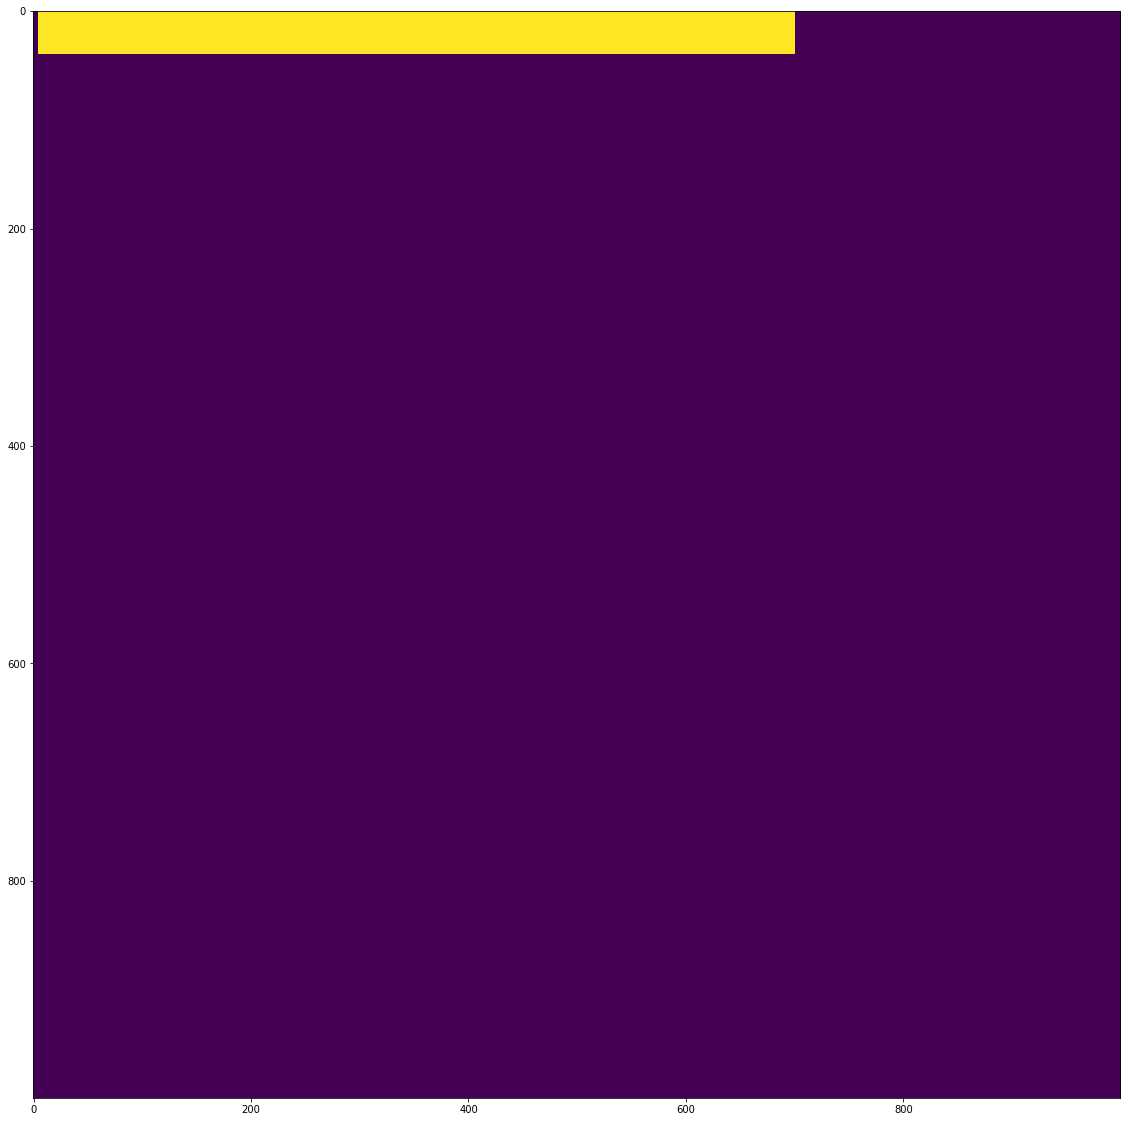

In [42]:
plt.figure(figsize =(20,20))
plt.imshow(mask)
#
plt.show()

In [7]:
print ingredients, area, pizza.shape

4 12 (200, 250)


In [24]:
h = np.zeros((50,50))

In [28]:
deb = np.array([1,5])
end = np.array([2,15])

In [29]:
h[deb[0]:end[0], deb[1]:end[1]] = 1

In [33]:
np.where(h==1)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]))